In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split


# Forge

X.shape (26, 2)


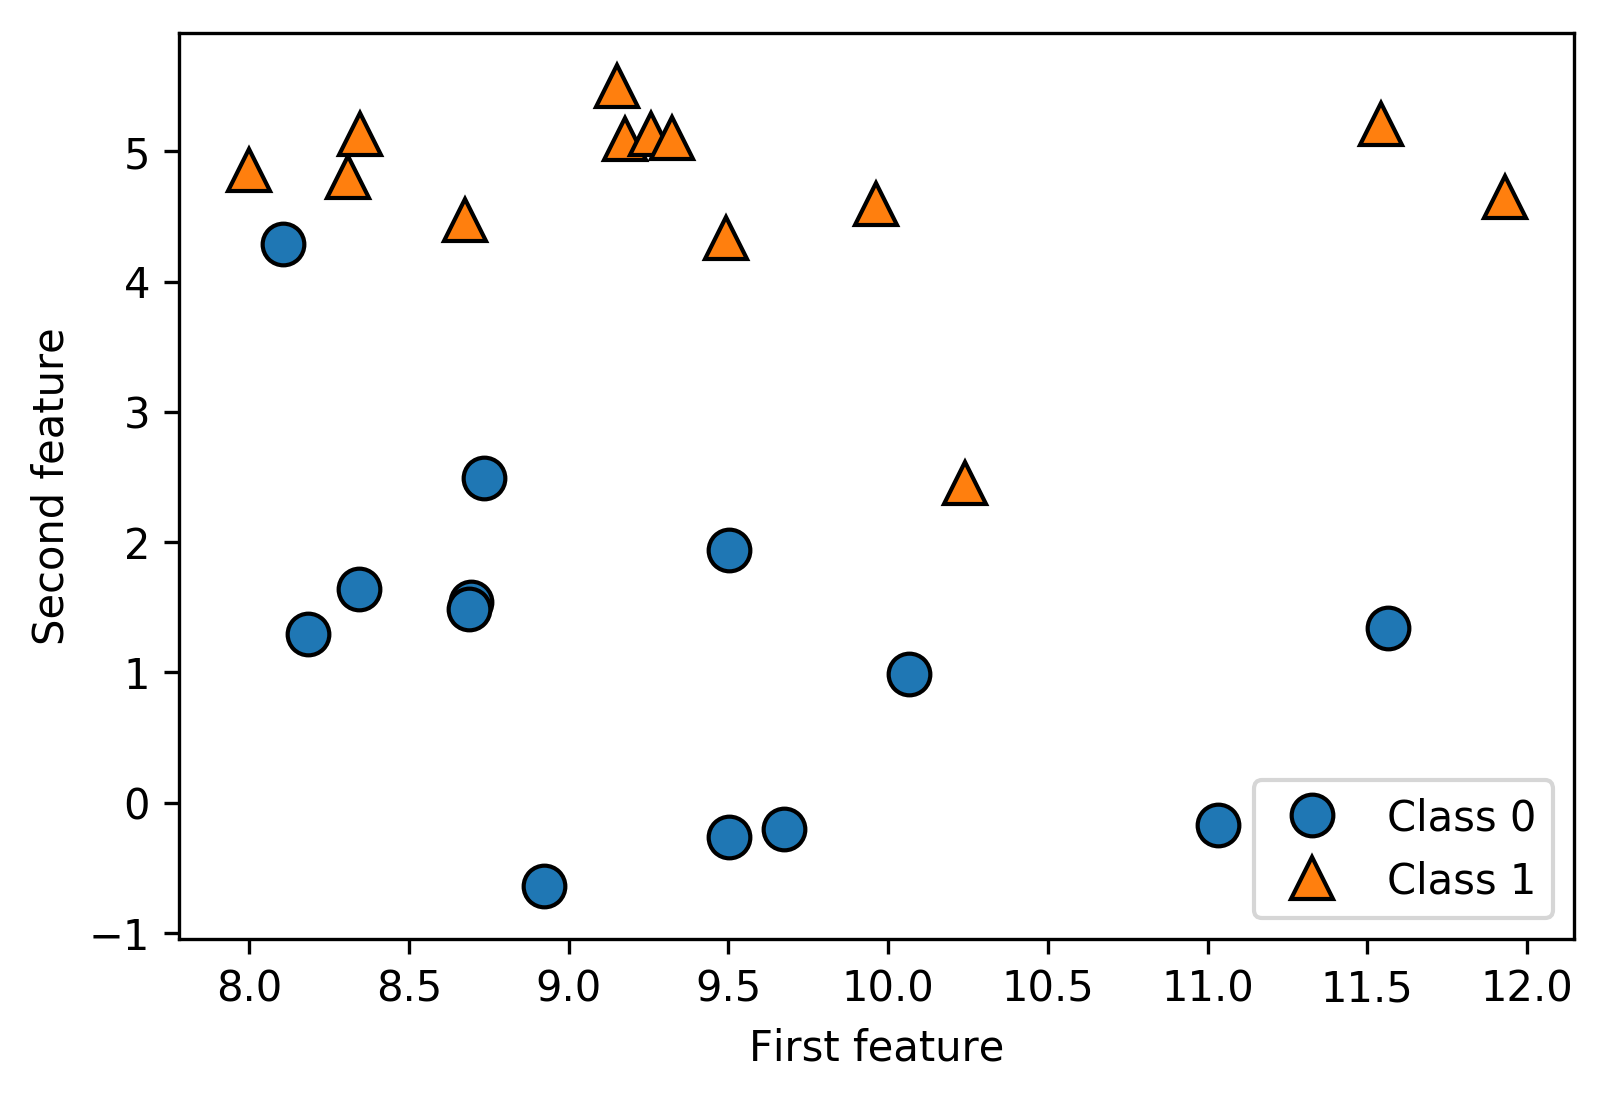

In [2]:
# generate the data
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape %s" % (X.shape,))

w[0]: 0.393906  b: -0.031804


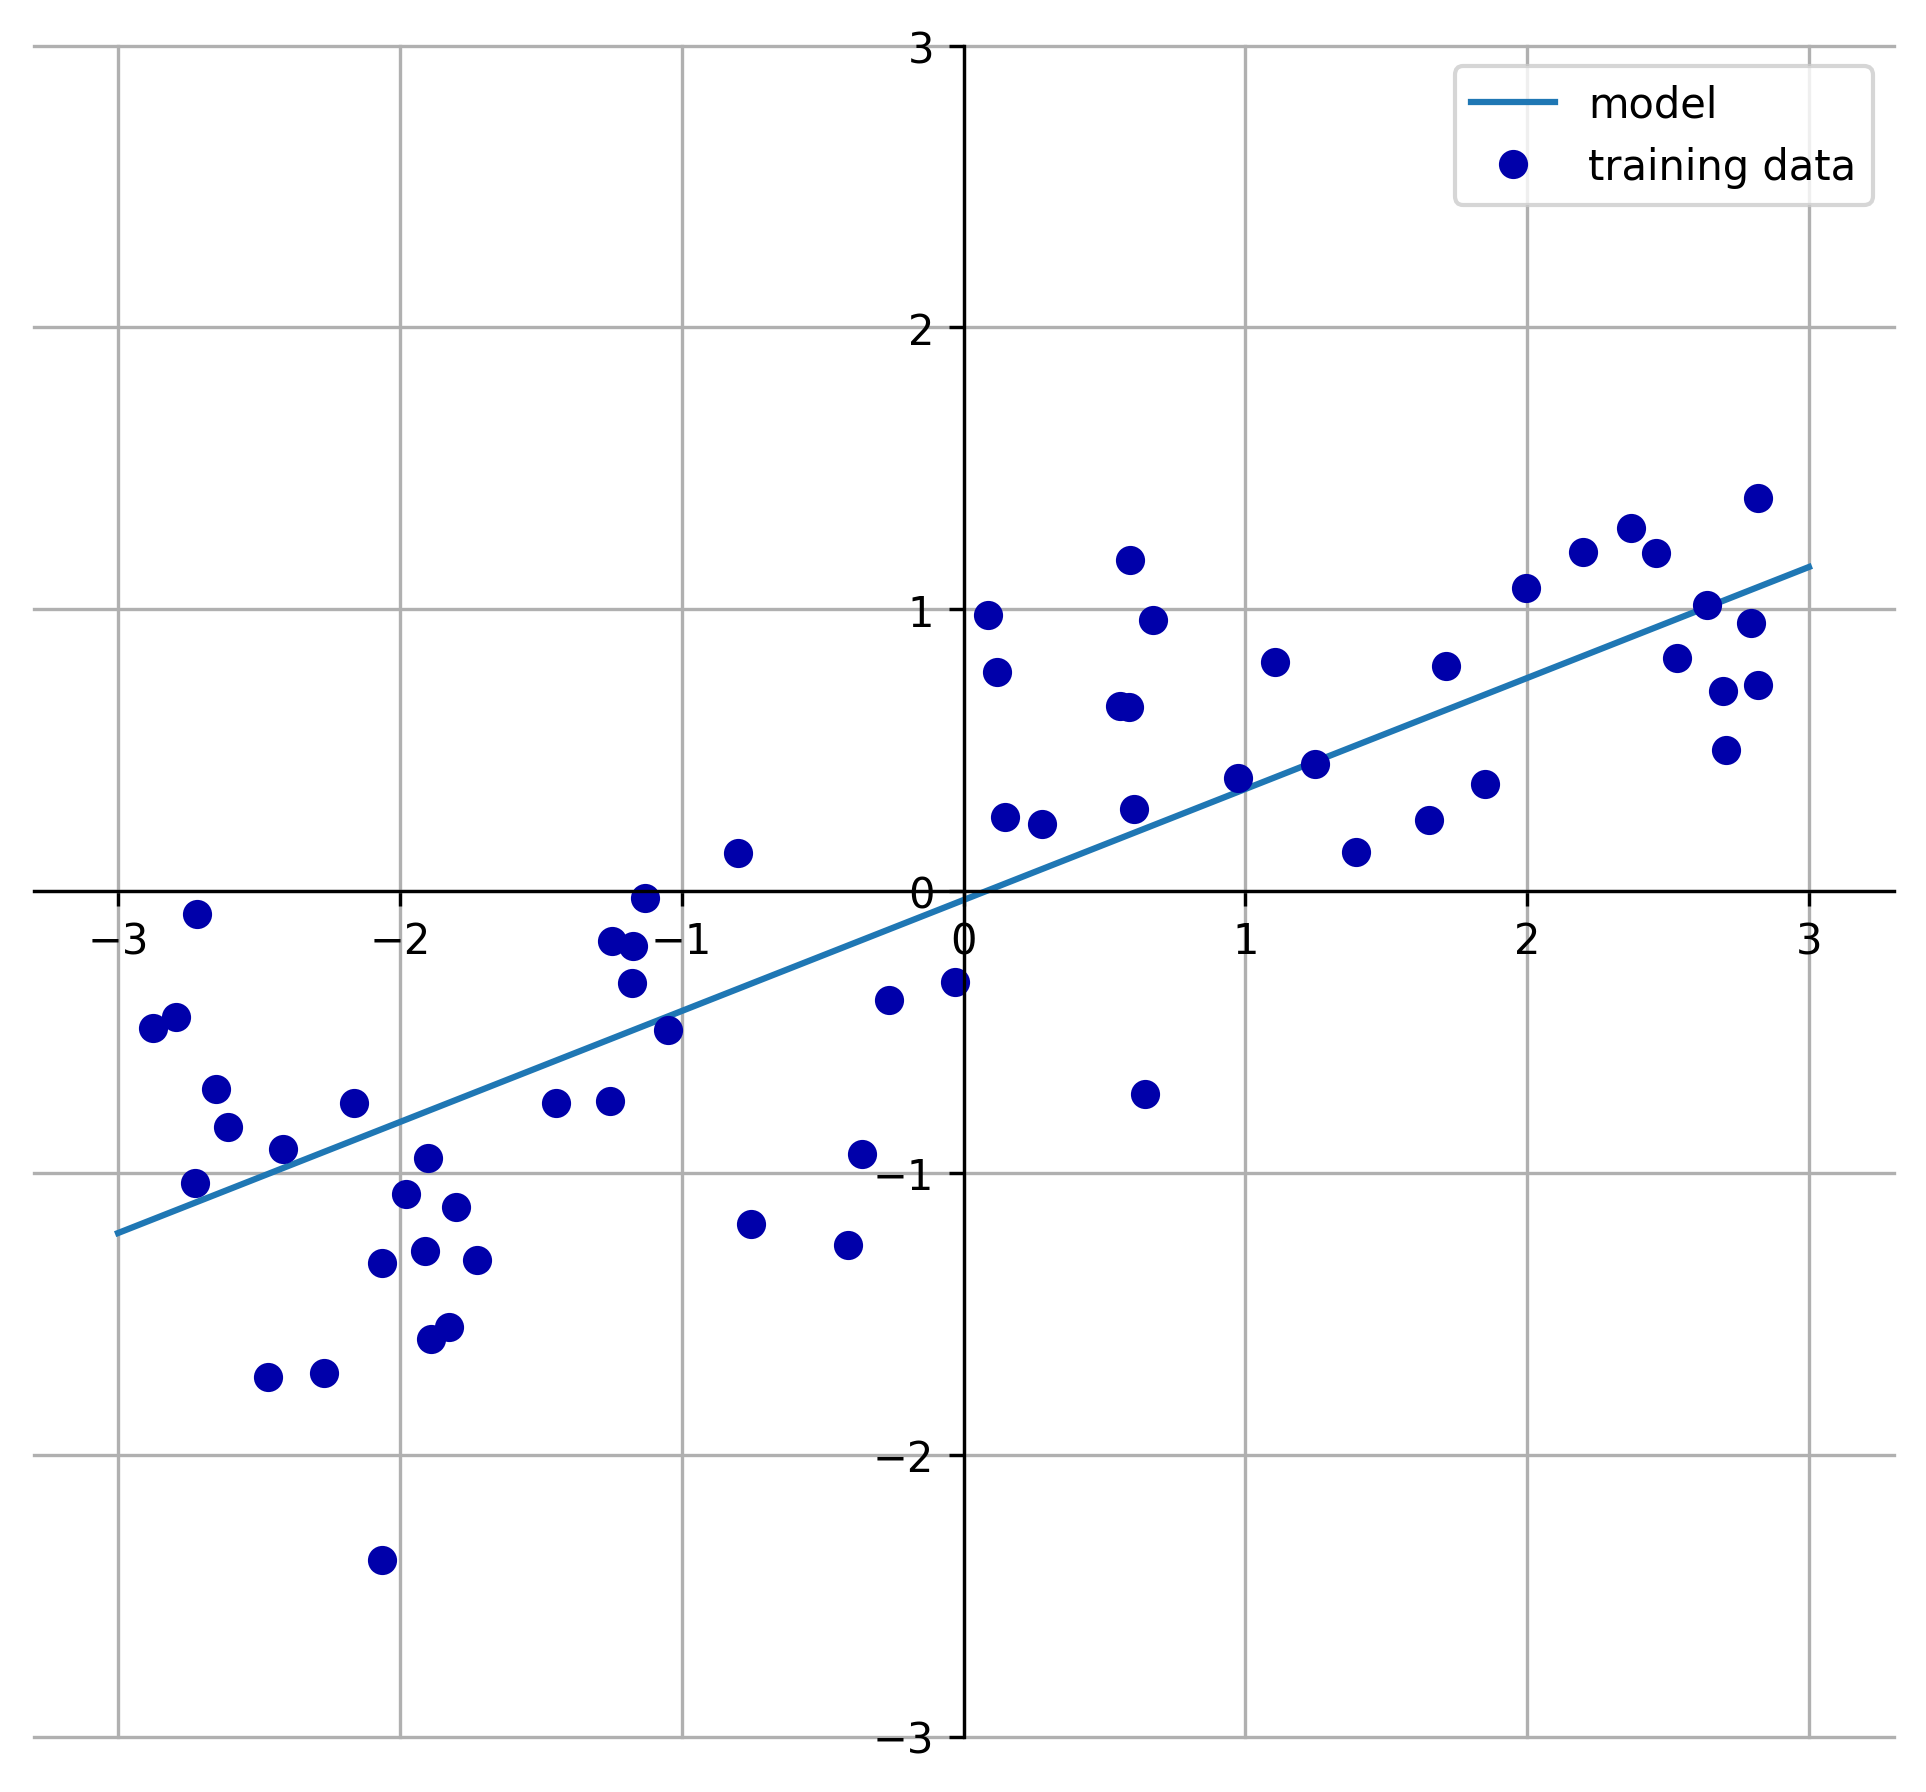

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept: {}".format(lr.intercept_))

lr.coef_: [ 0.394]
lr.intercept: -0.03180434302675976


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


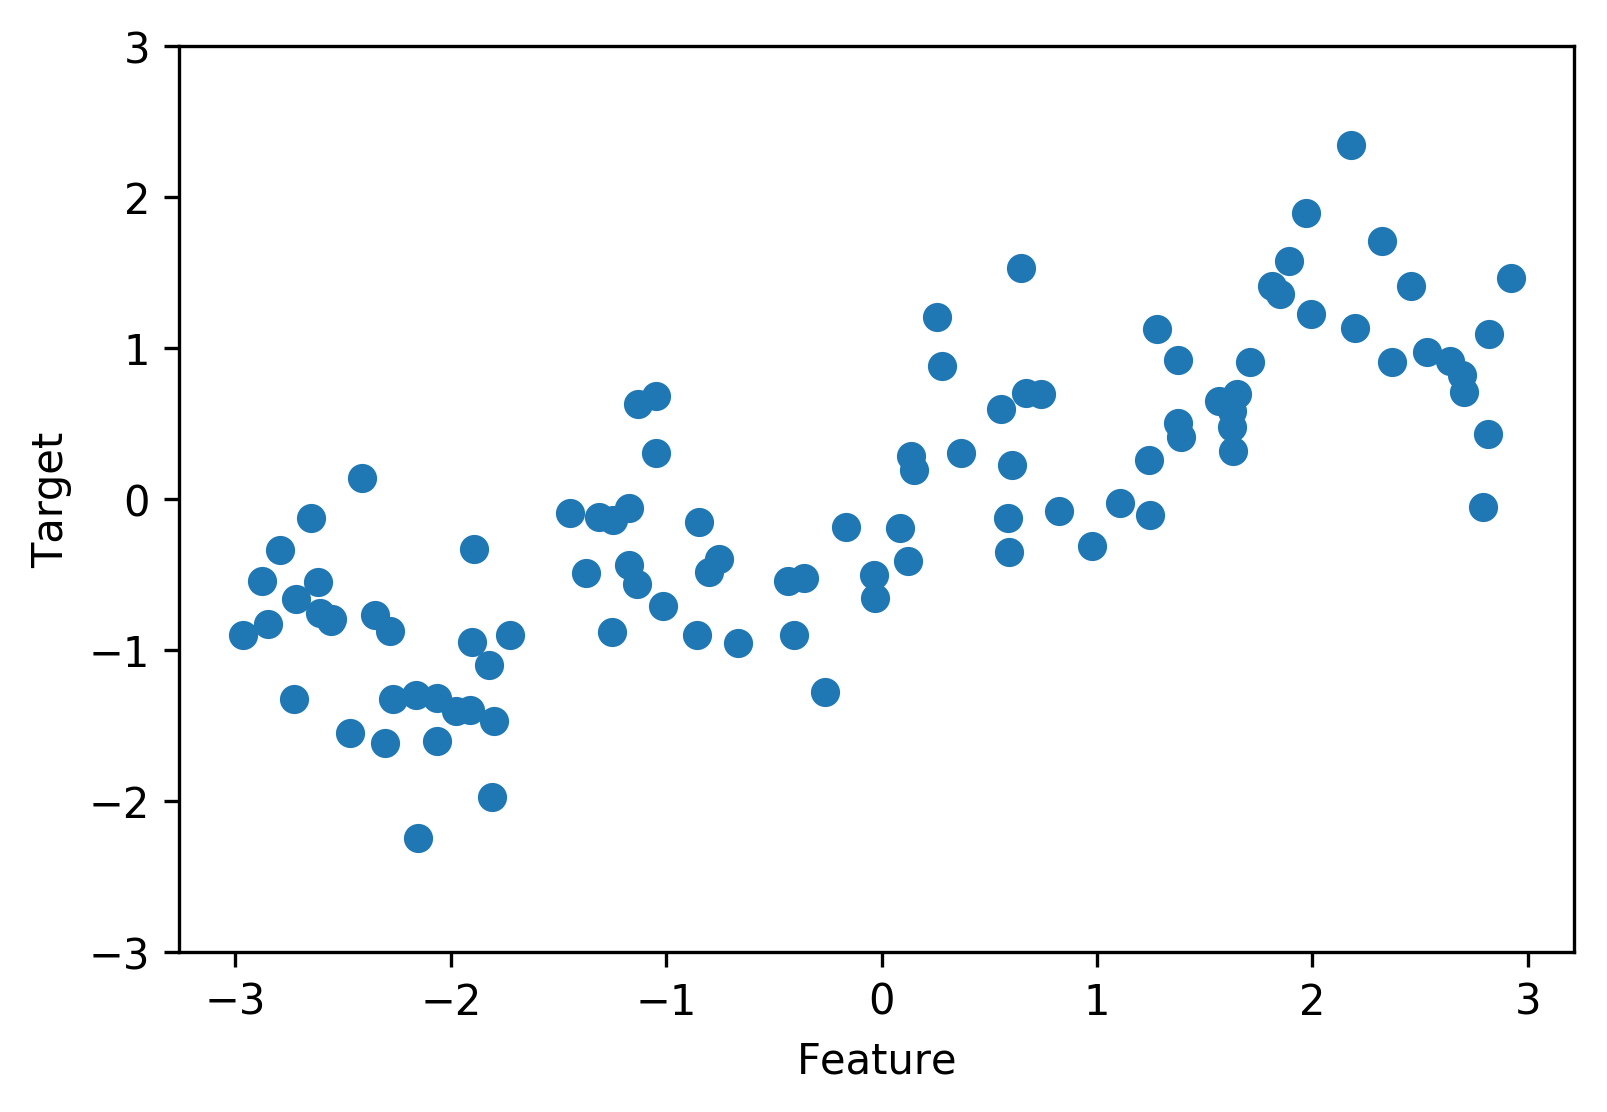

In [7]:
X, y = mglearn.datasets.make_wave()
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(cancer.keys())
print(cancer["DESCR"][:200])
print(cancer['target_names'])
print(cancer['feature_names'])
print(cancer['data'].shape)
print(cancer['data'][:3])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric,
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
[[  1.799e+01   1.038e+01   1.228e+02   1.001e+03   1.184e-01   2.776e-01
    3.001e-01   1.471e-01   2.419e-01   7.871e-02   1.095e+00   9.053e-01
    8.589e+00   1.534e+02   6.399e-03

In [10]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [11]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


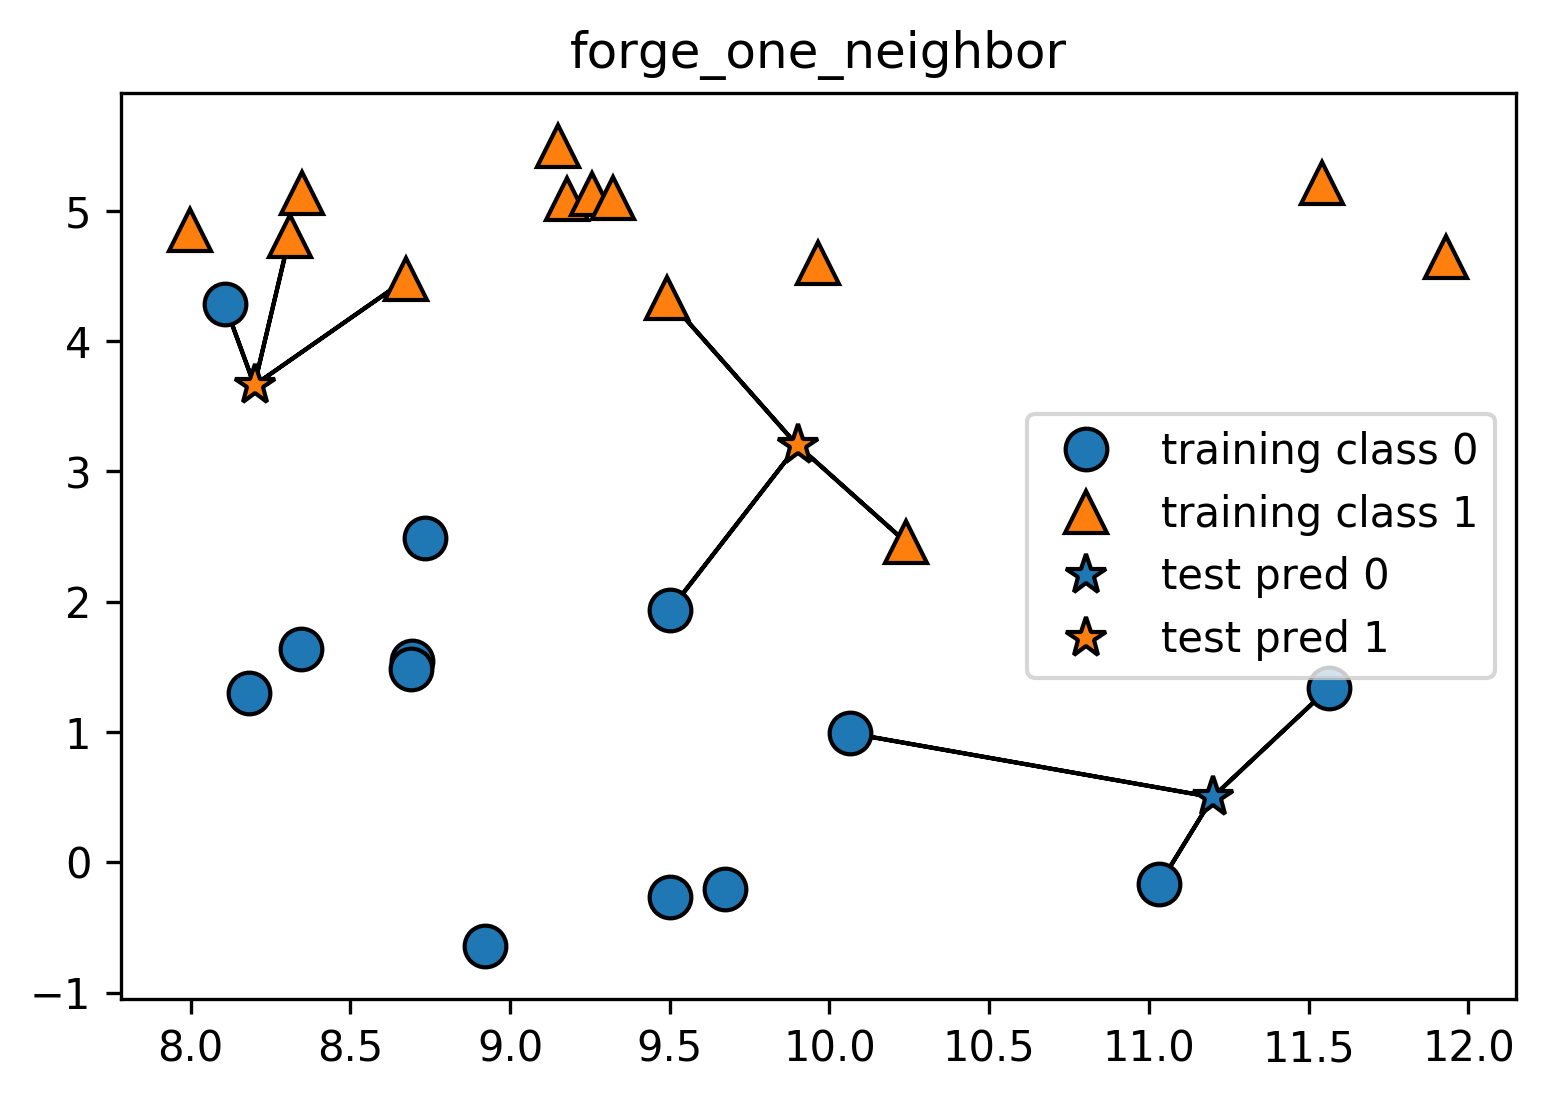

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title("forge_one_neighbor")

In [16]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [19]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.86


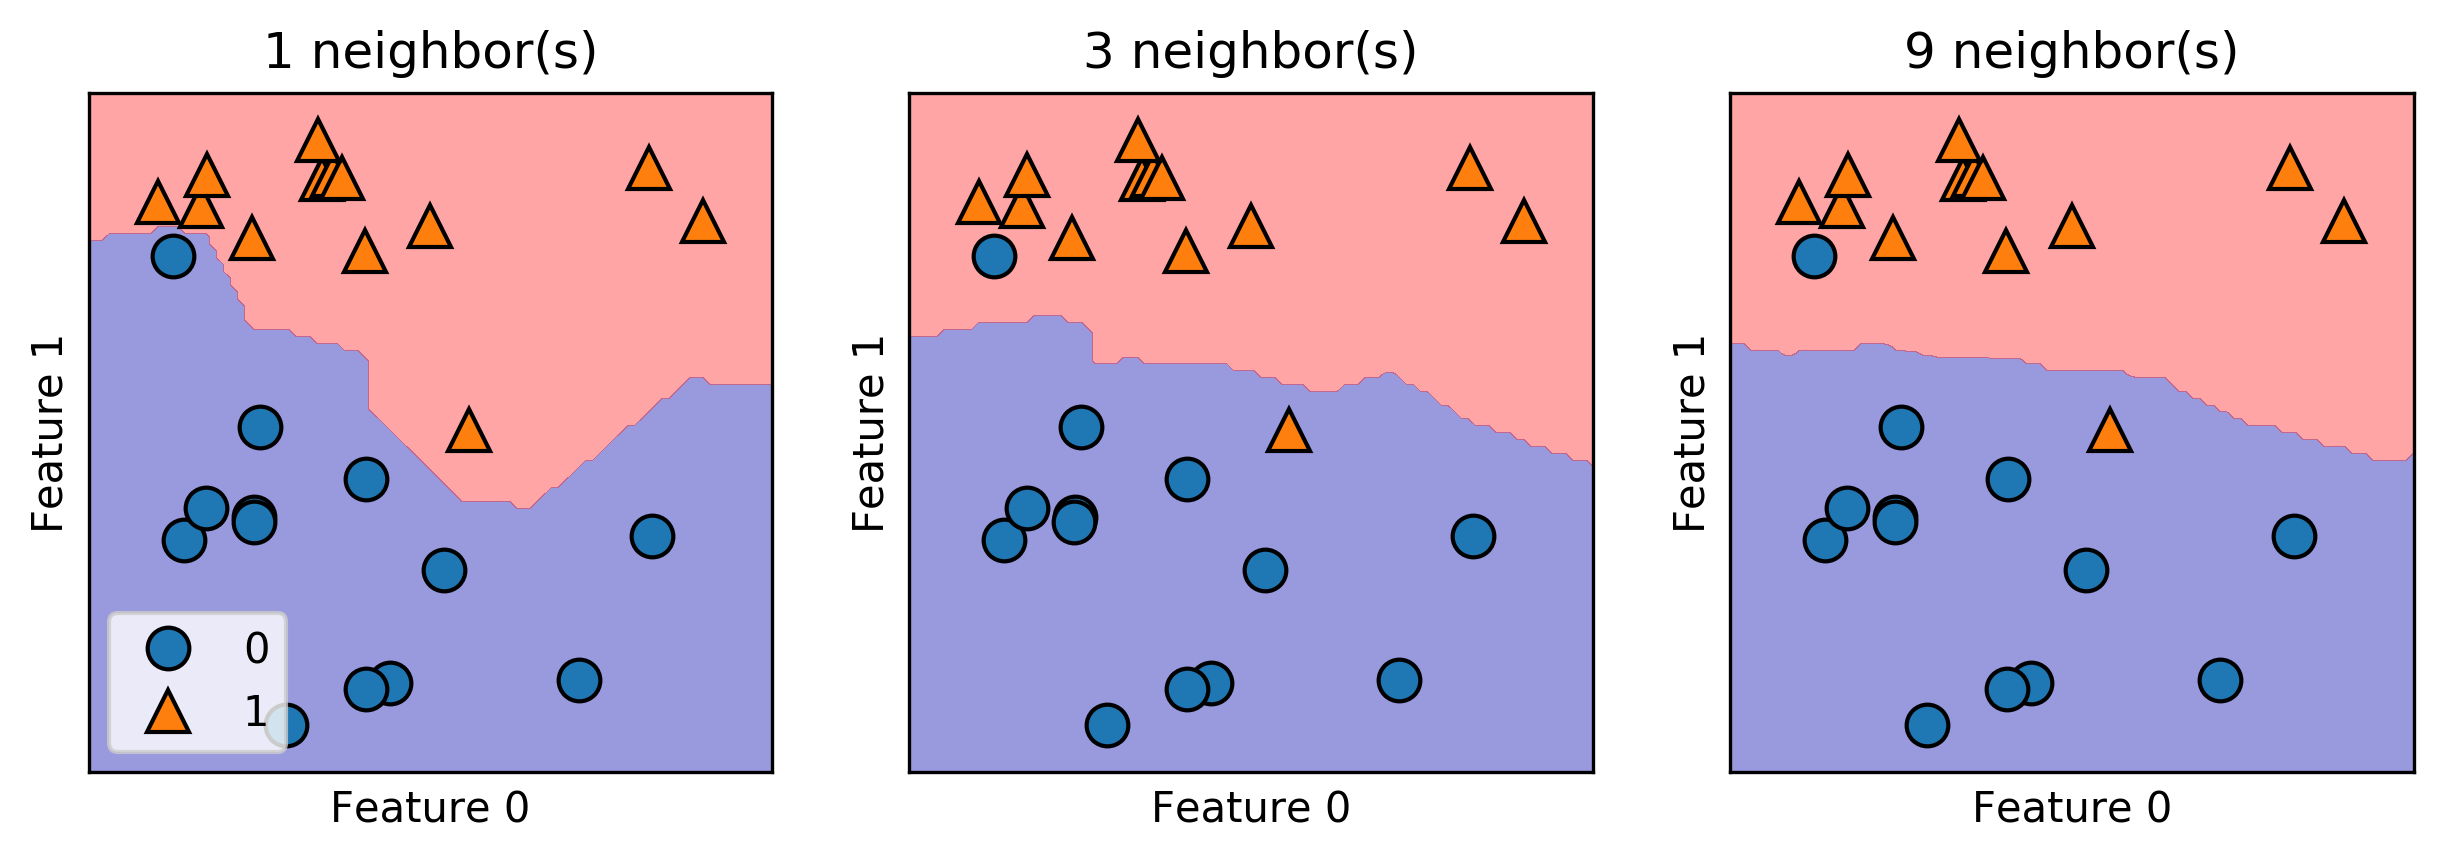

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # The fit method returns the object self
    # so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("%d neighbor(s)" % n_neighbors)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend(loc=3)

<function matplotlib.pyplot.legend>

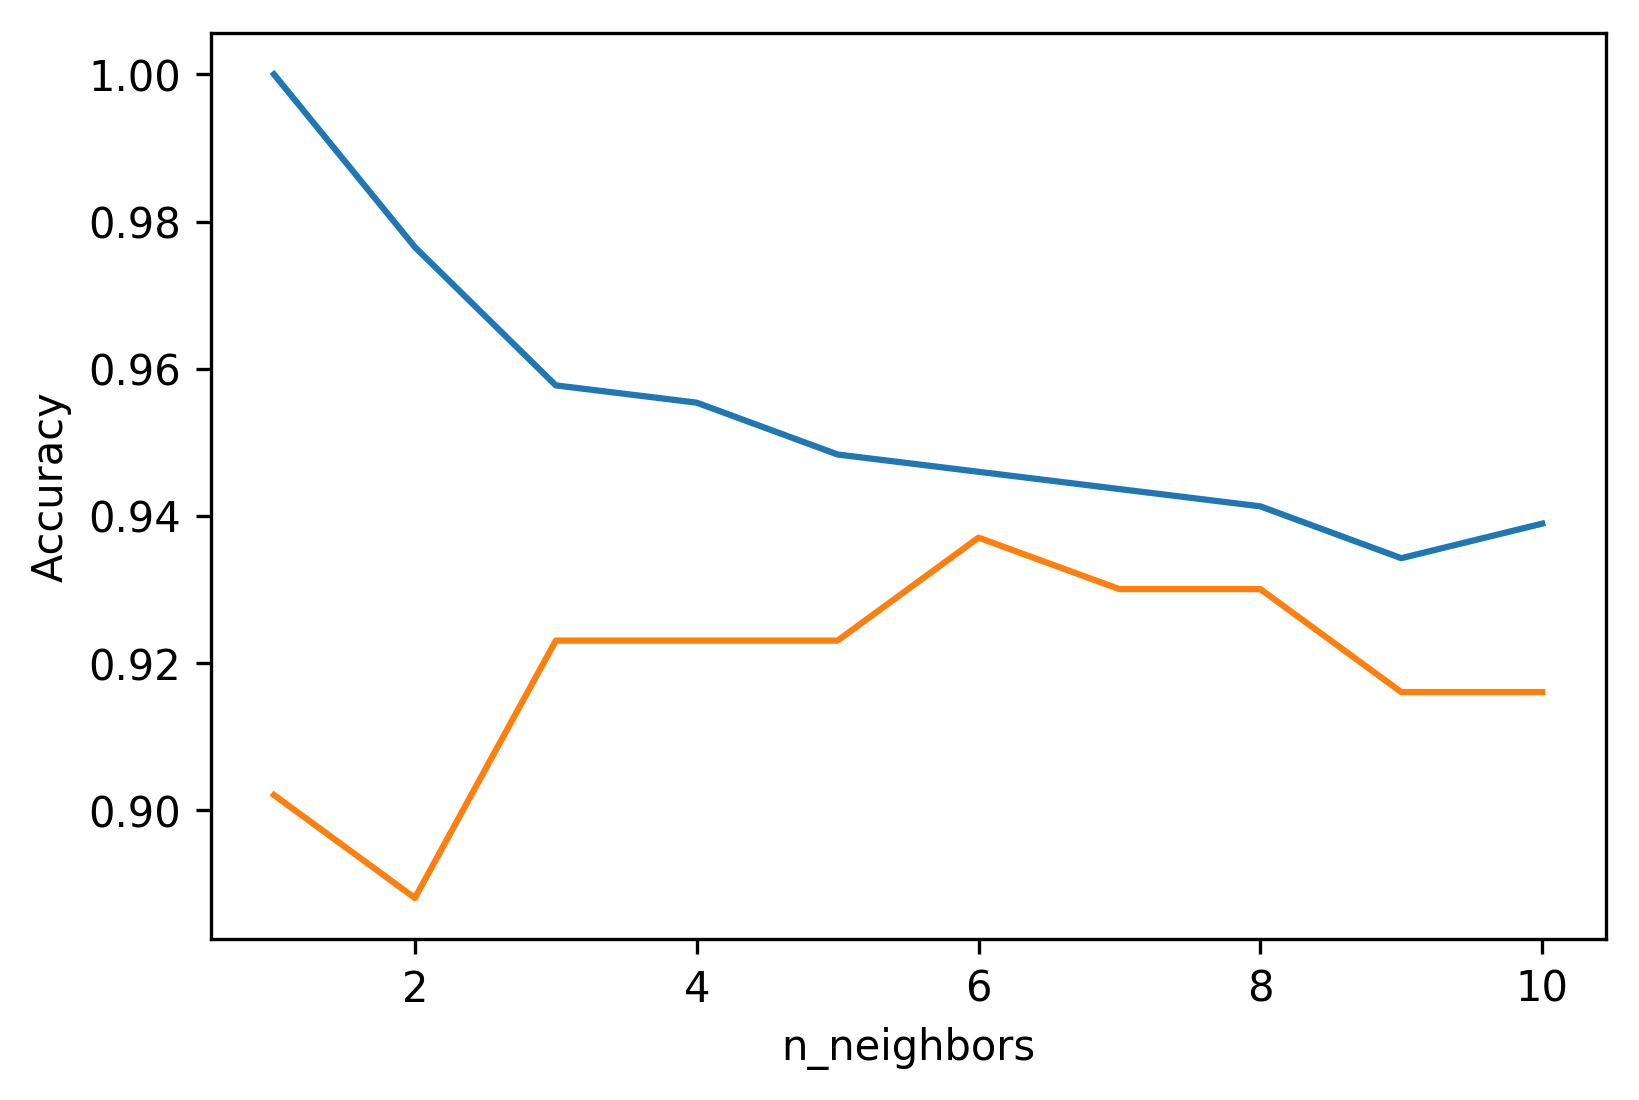

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend

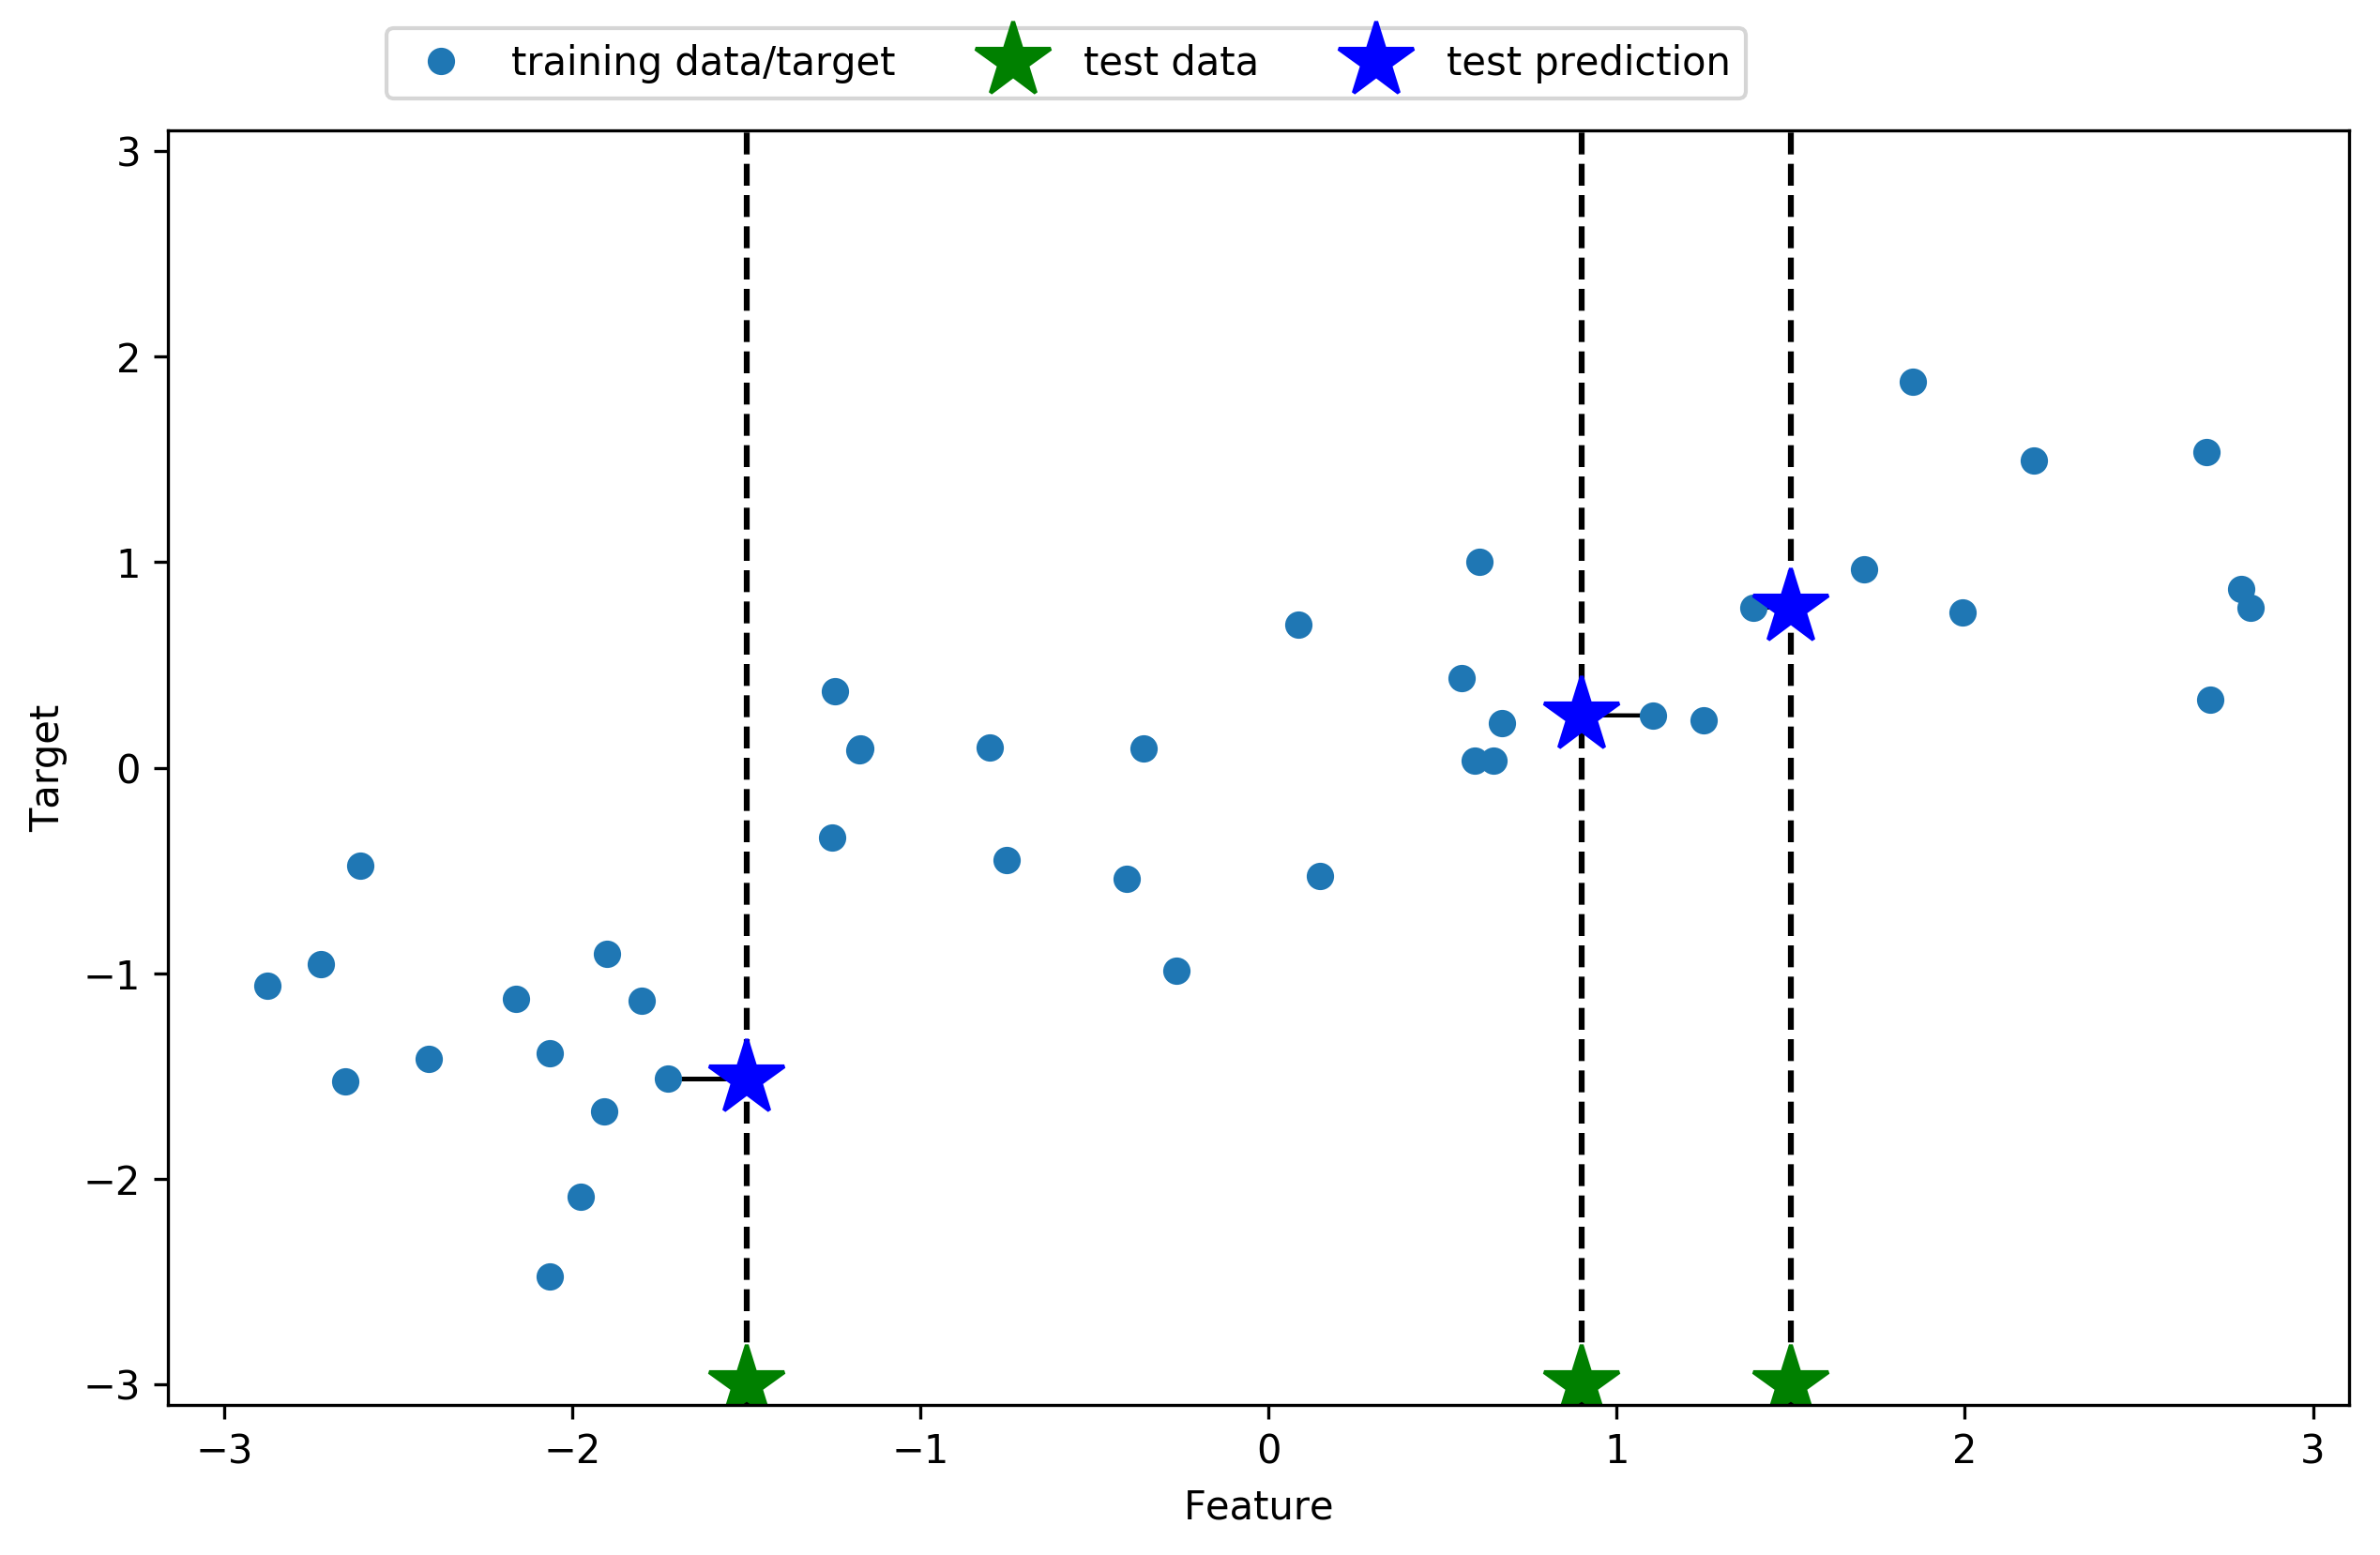

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

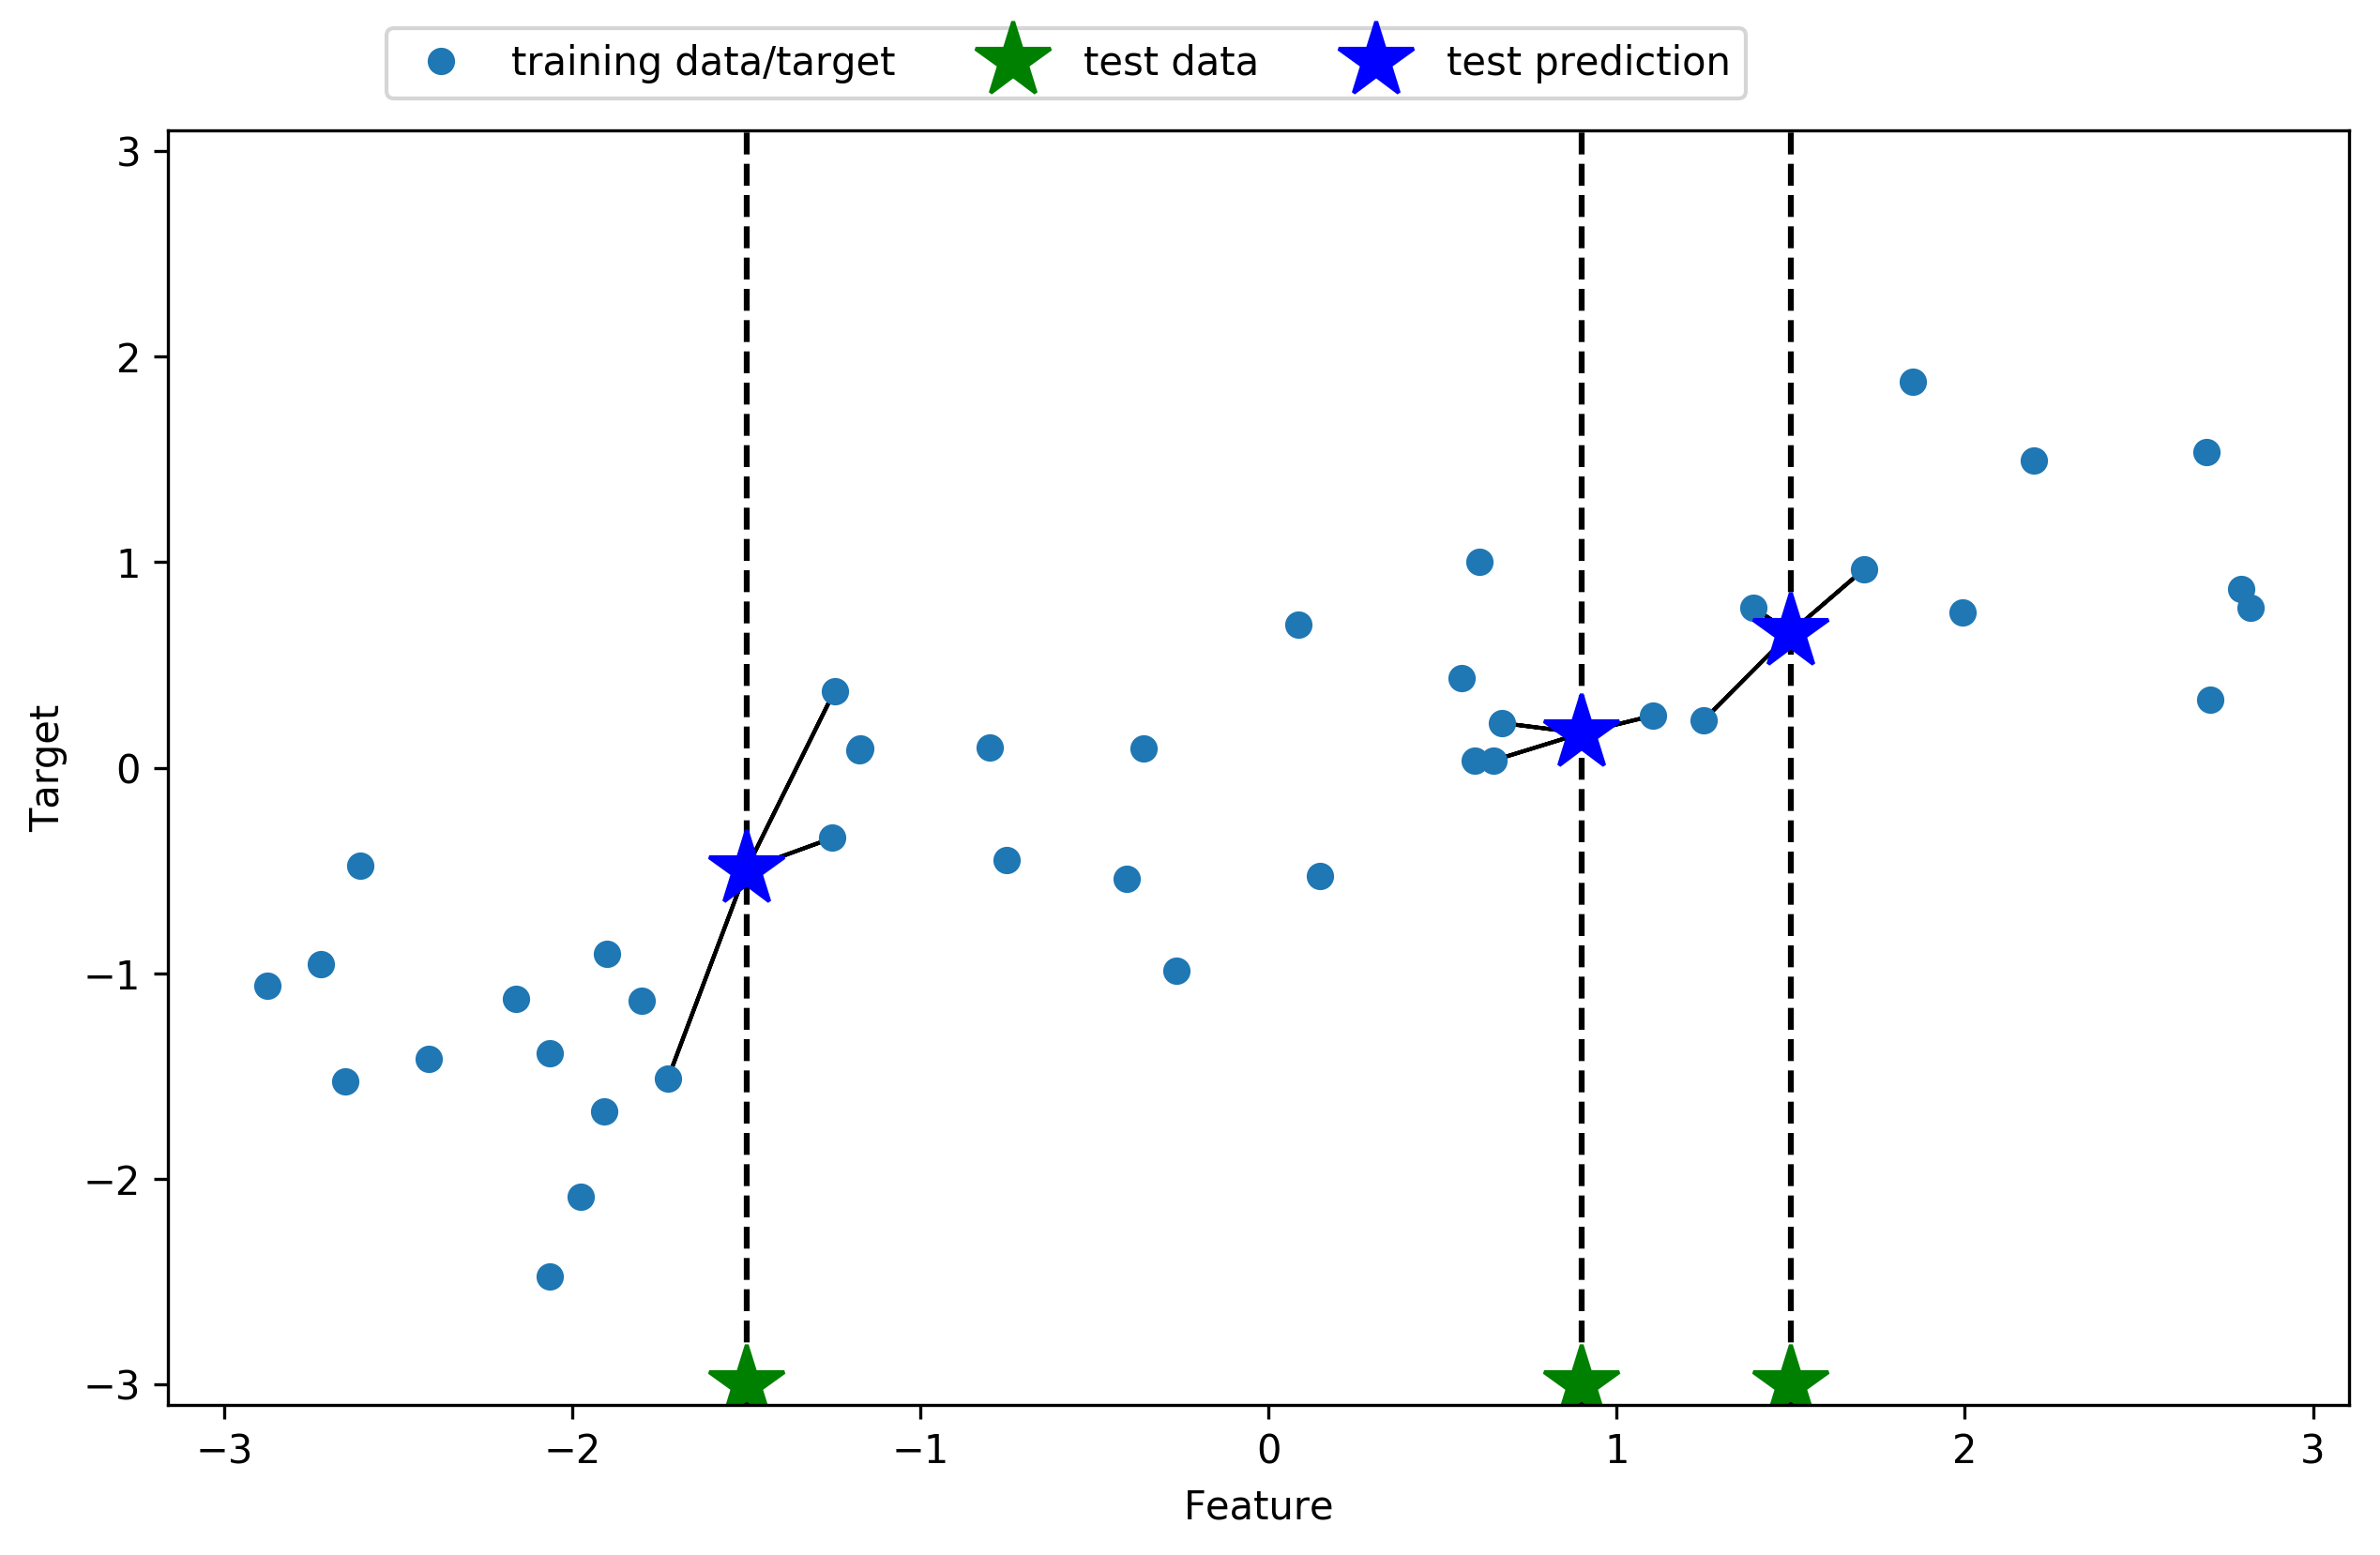

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:”
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

In [26]:
print("Test set accuracy: %.2f" % reg.score(X_test, y_test))

Test set accuracy: 0.83


Nearest Neighbor Regression
Nearest Neighbor Regression
Nearest Neighbor Regression


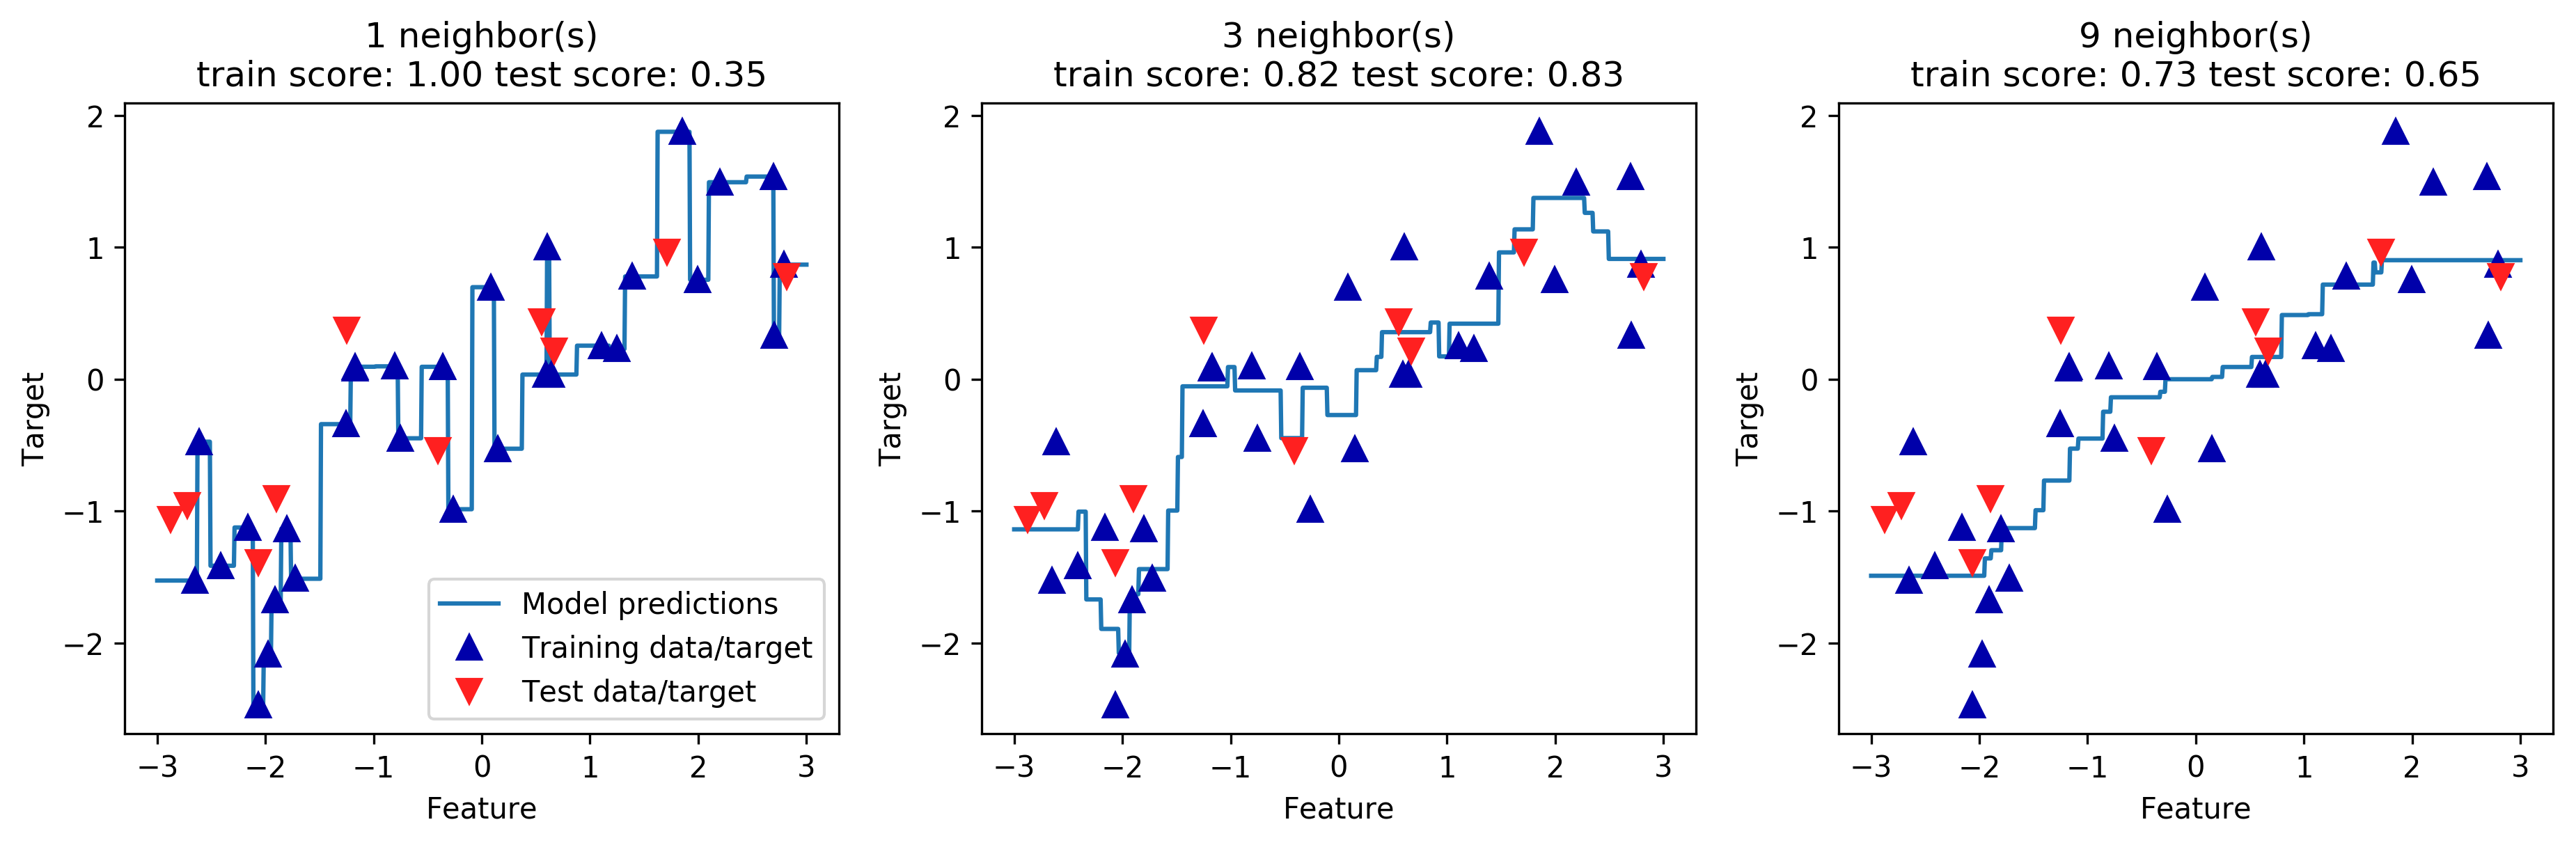

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
## create 1000 datapoints, evenly spaced between -3, 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("%d neighbor(s)\ntrain score: %.2f test score: %.2f" %
                (n_neighbors,
                reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                   "Test data/target"], loc="best")
    print("Nearest Neighbor Regression")

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr_coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr_coef_:[ 0.394]
lr.intercept_:-0.03180434302675976


In [29]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score:0.66


In [30]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.95
Test set score:0.61


In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


In [32]:
ridge01 = Ridge(alpha=0.09).fit(X_train, y_train)
print("Training set score - ridge01:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score - ridge01:{:.2f}".format(ridge01.score(X_test, y_test)))

Training set score - ridge01:0.93
Test set score - ridge01:0.77


In [33]:
ridge_00 = Ridge(alpha=.3).fit(X_train, y_train)
print("Training set score - ridge_00:{:.2f}".format(ridge_00.score(X_train, y_train)))
print("Test set score - ridge_00:{:.2f}".format(ridge_00.score(X_test, y_test)))

Training set score - ridge_00:0.91
Test set score - ridge_00:0.77


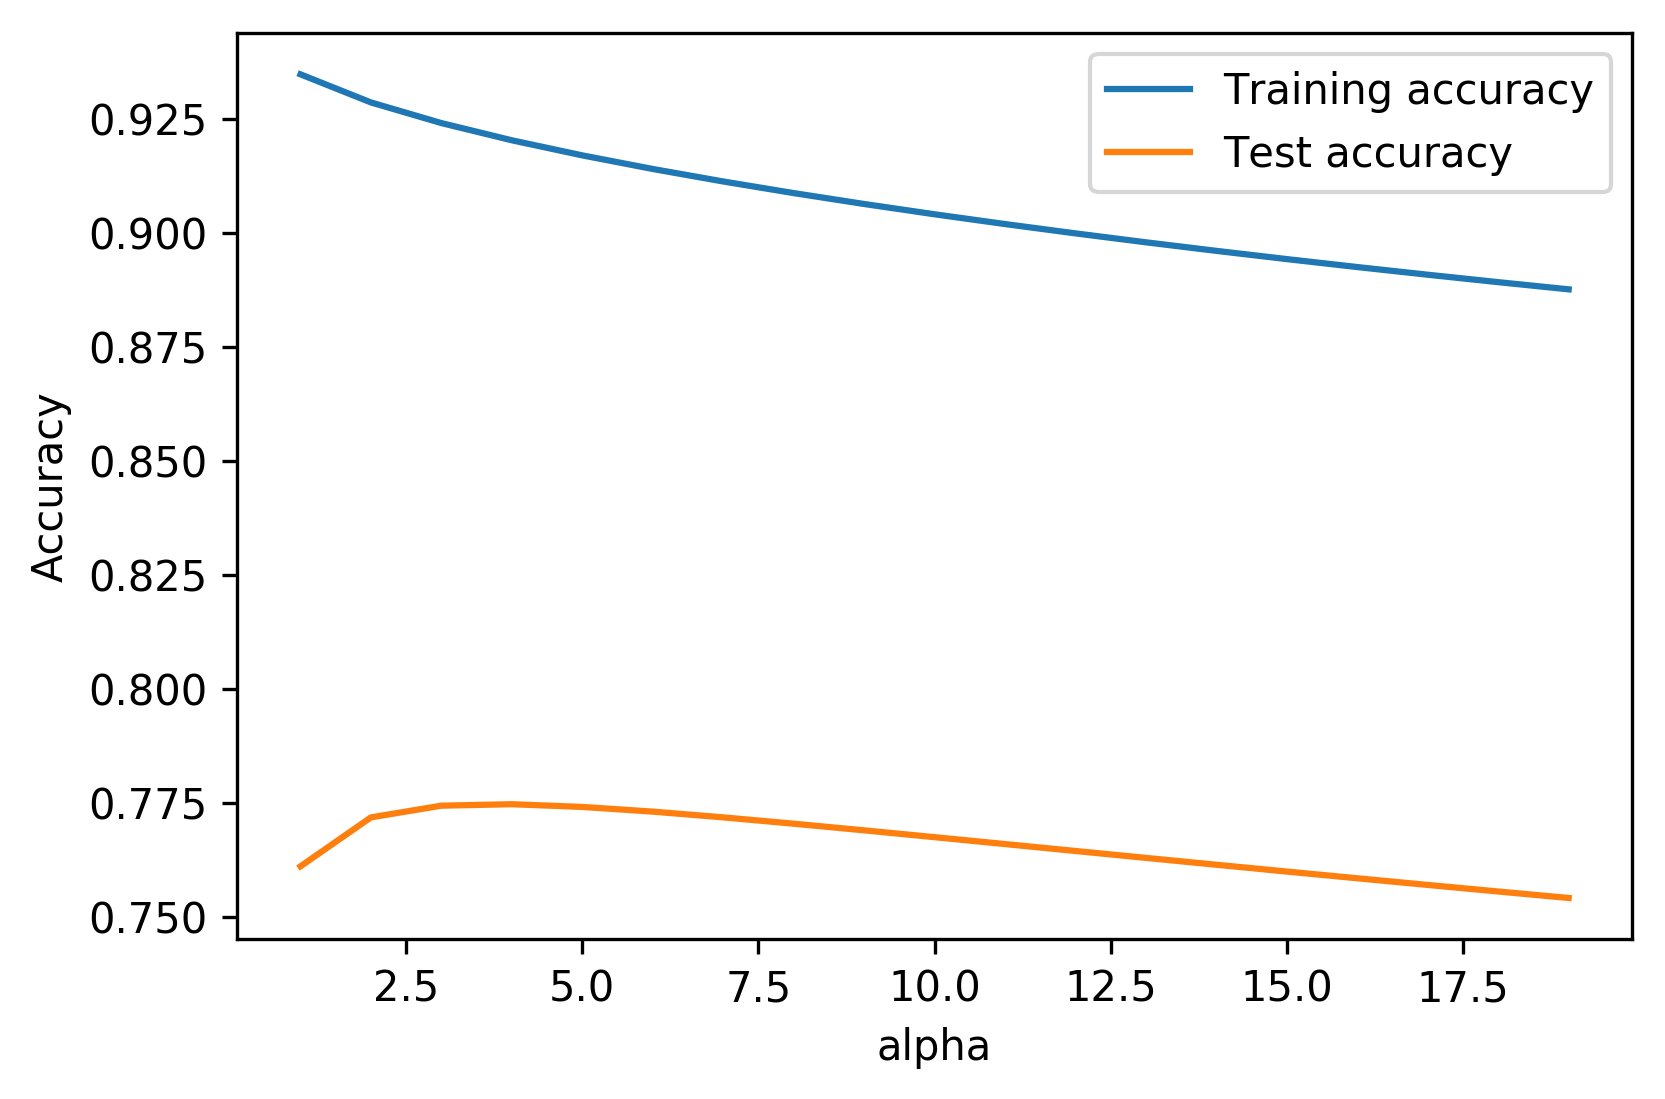

In [34]:
training_accuracy = []
test_accuracy = []
alpha = range(1, 20)

for a in alpha:
    # build the model
    rdg = Ridge(alpha=a/20).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(rdg.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(rdg.score(X_test, y_test))
    
plt.plot(alpha, training_accuracy, label="Training accuracy")
plt.plot(alpha, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

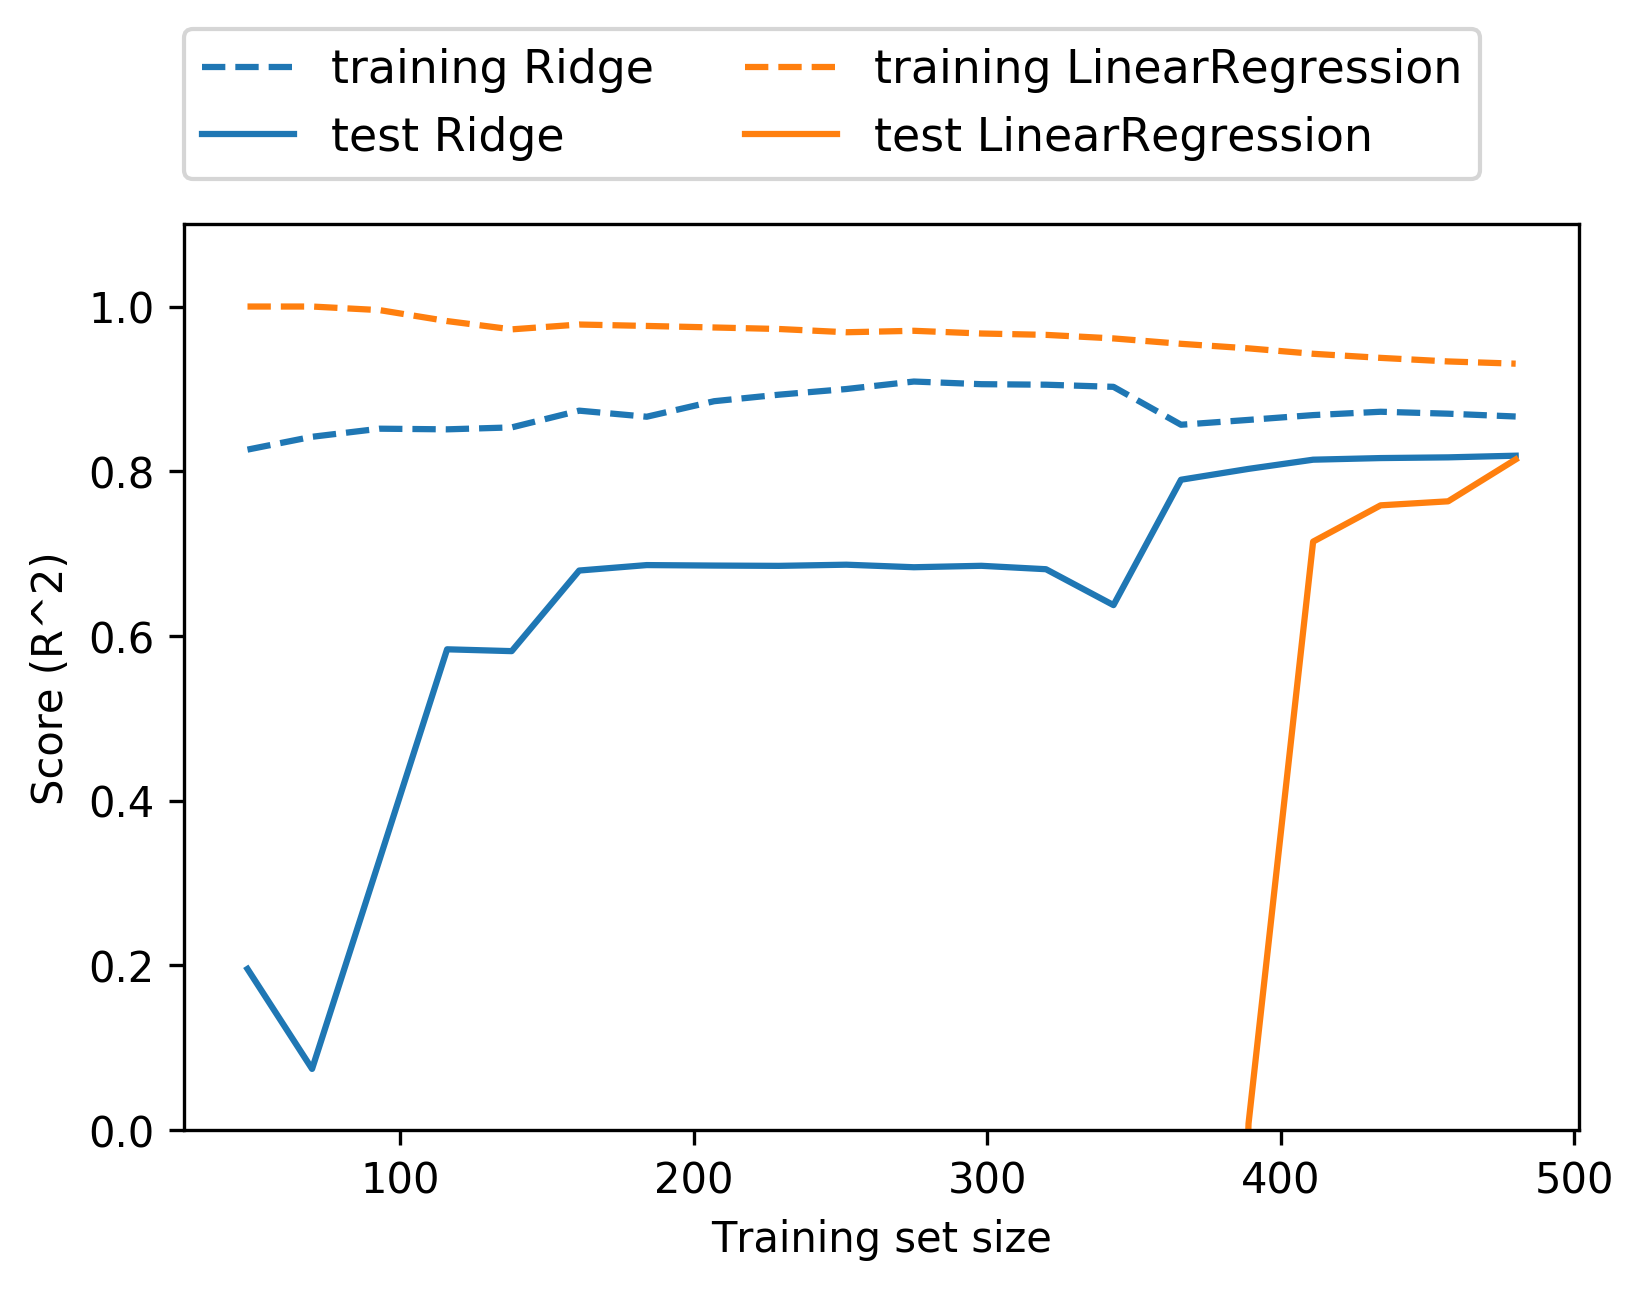

In [35]:
mglearn.plots.plot_ridge_n_samples()

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features uses: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features uses: 4


In [37]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features uses: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features uses: 33


In [38]:
lasso006 = Lasso(alpha=0.006, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso006.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso006.score(X_test, y_test)))
print("Number of features uses: {}".format(np.sum(lasso006.coef_ != 0)))

Training set score: 0.91
Test set score: 0.78
Number of features uses: 40


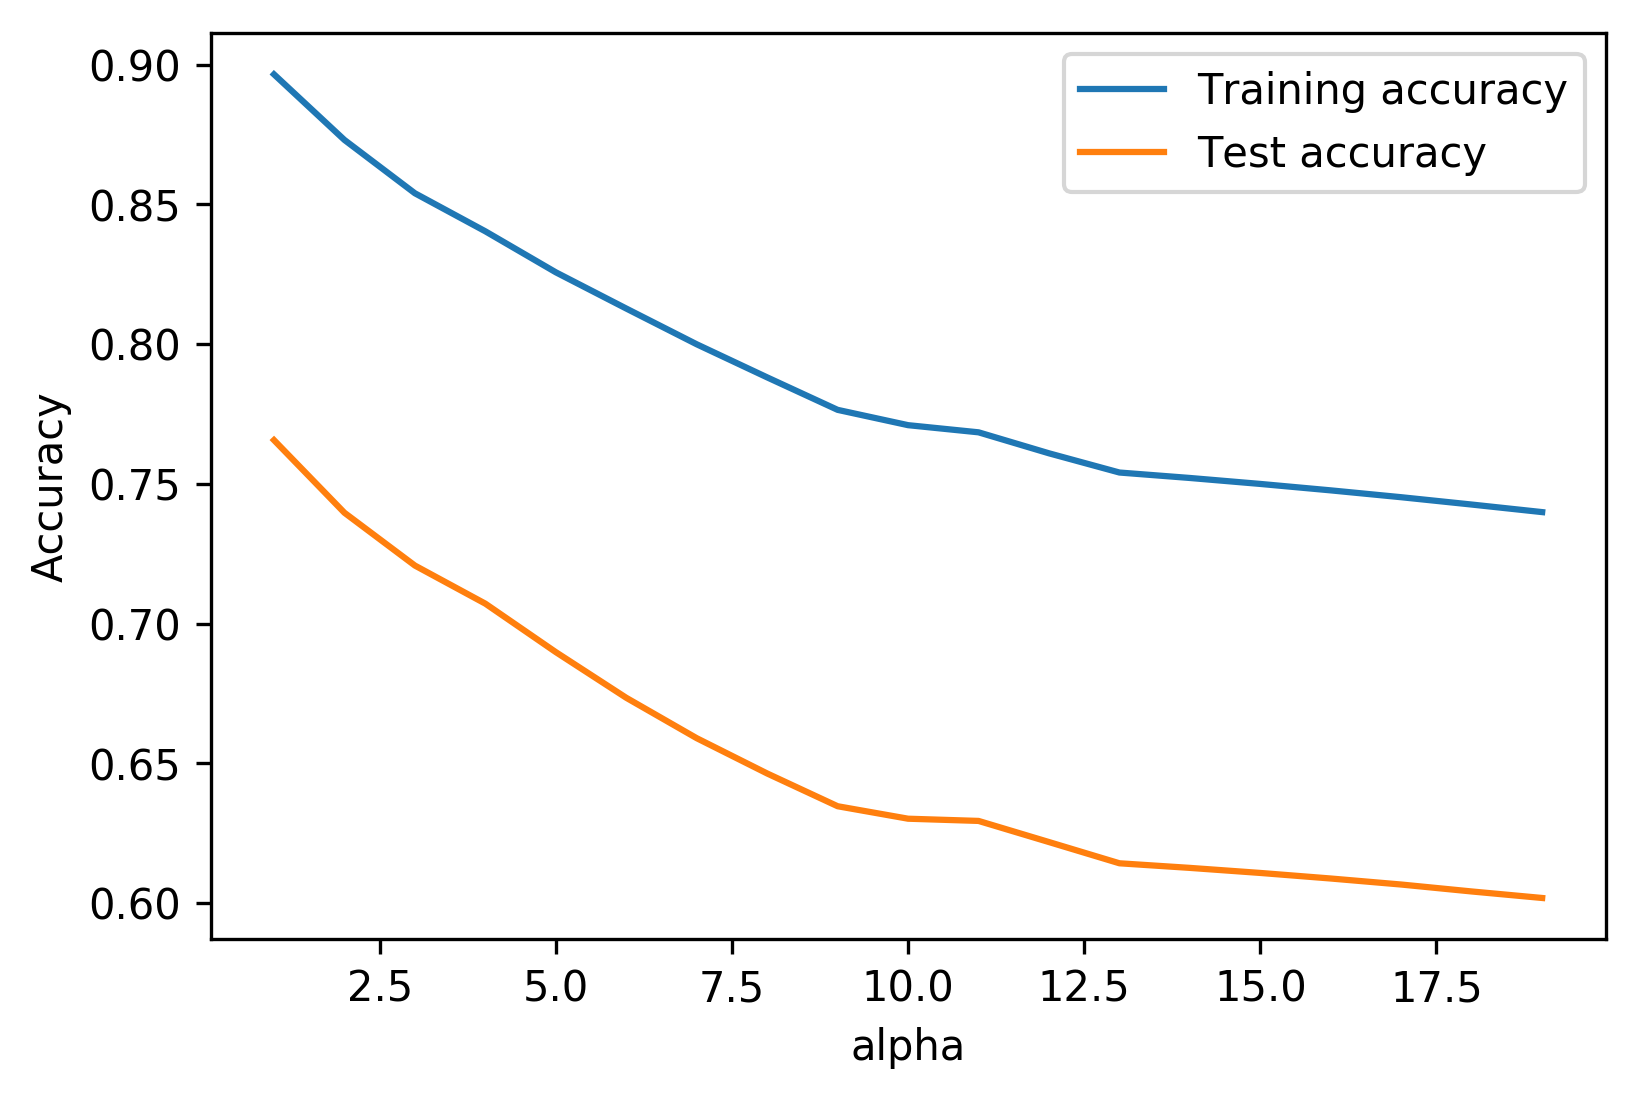

In [39]:
training_accuracy = []
test_accuracy = []
alpha = range(1, 20)
features_used = []

for a in alpha:
    # build the model
    rdg = Lasso(alpha=a/100, max_iter=1000000).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(rdg.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(rdg.score(X_test, y_test))
    # record feature usage
    features_used.append(np.sum(rdg.coef_ != 0))
    
plt.plot(alpha, training_accuracy, label="Training accuracy")
plt.plot(alpha, test_accuracy, label="Test accuracy")
#plt.plot(alpha, features_used, label="Features used")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

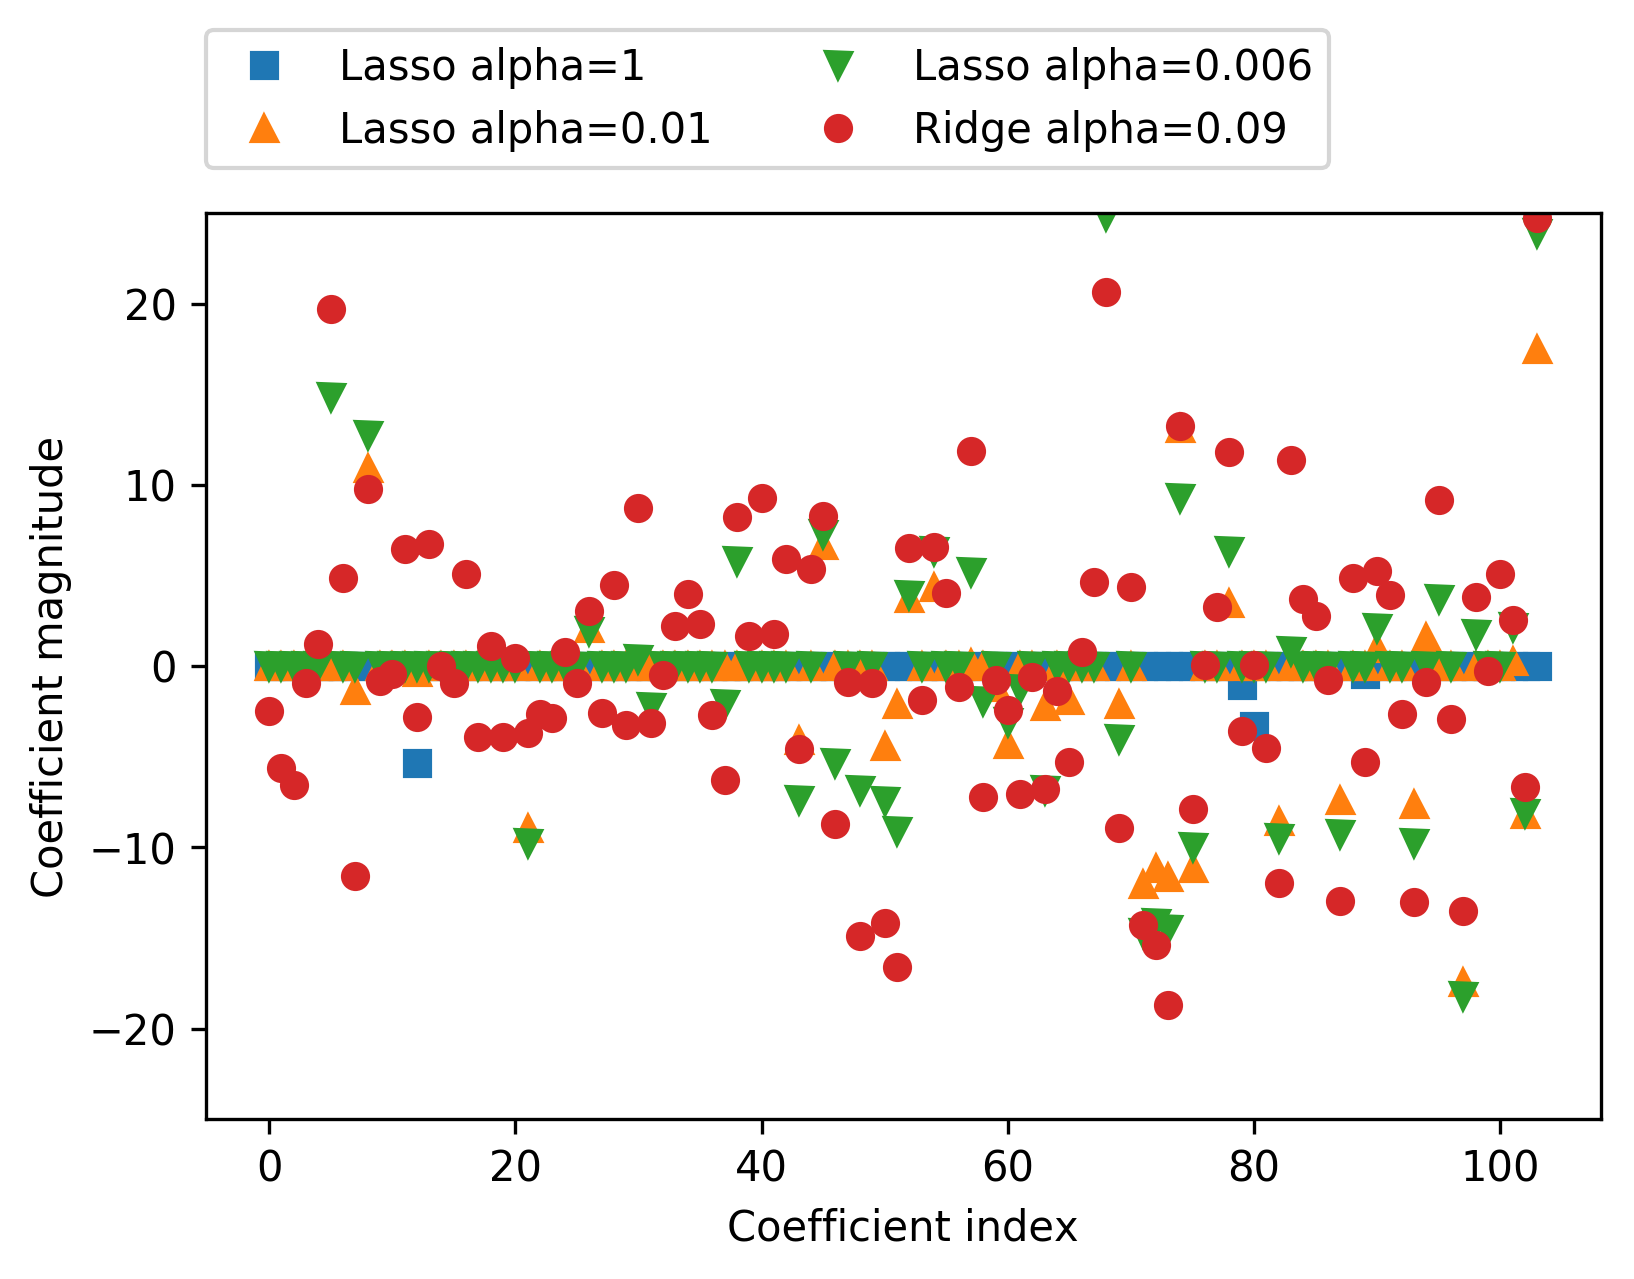

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso006.coef_, 'v', label="Lasso alpha=0.006")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.09")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

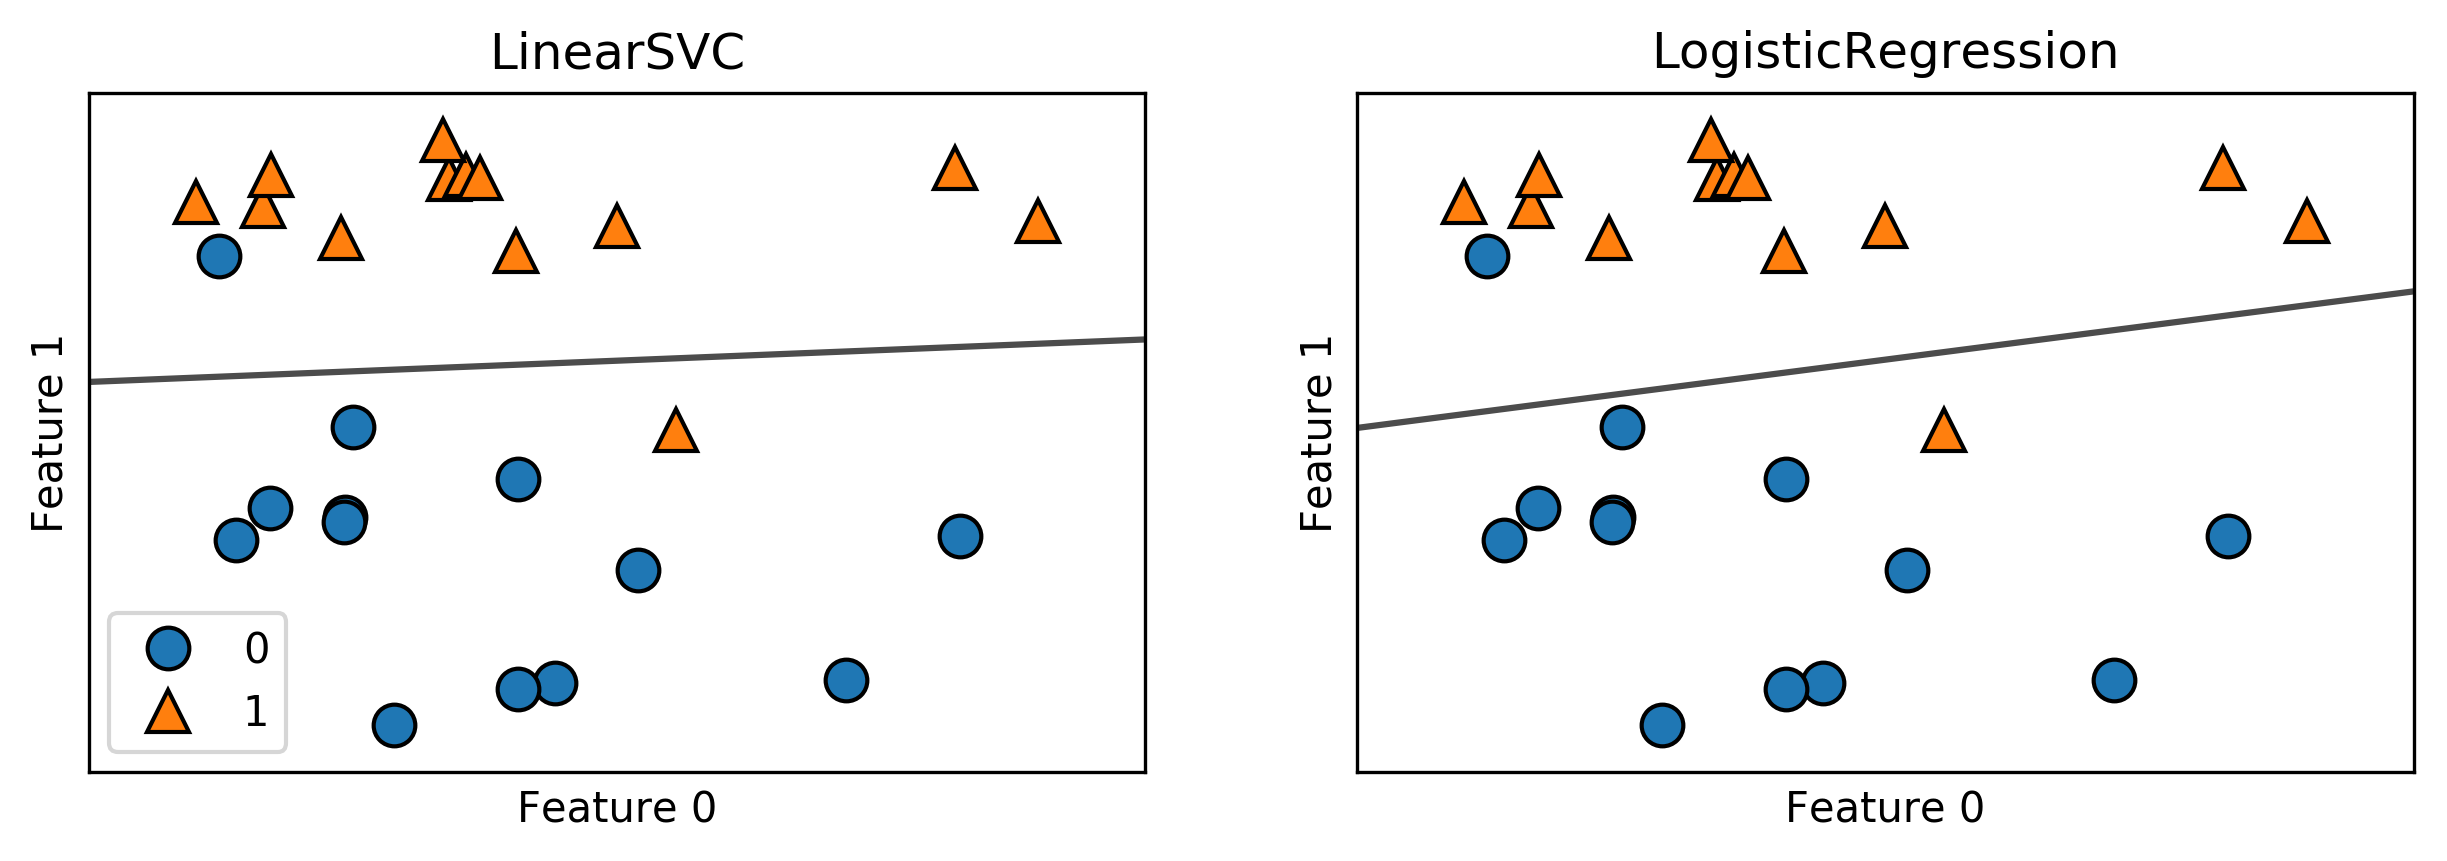

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()

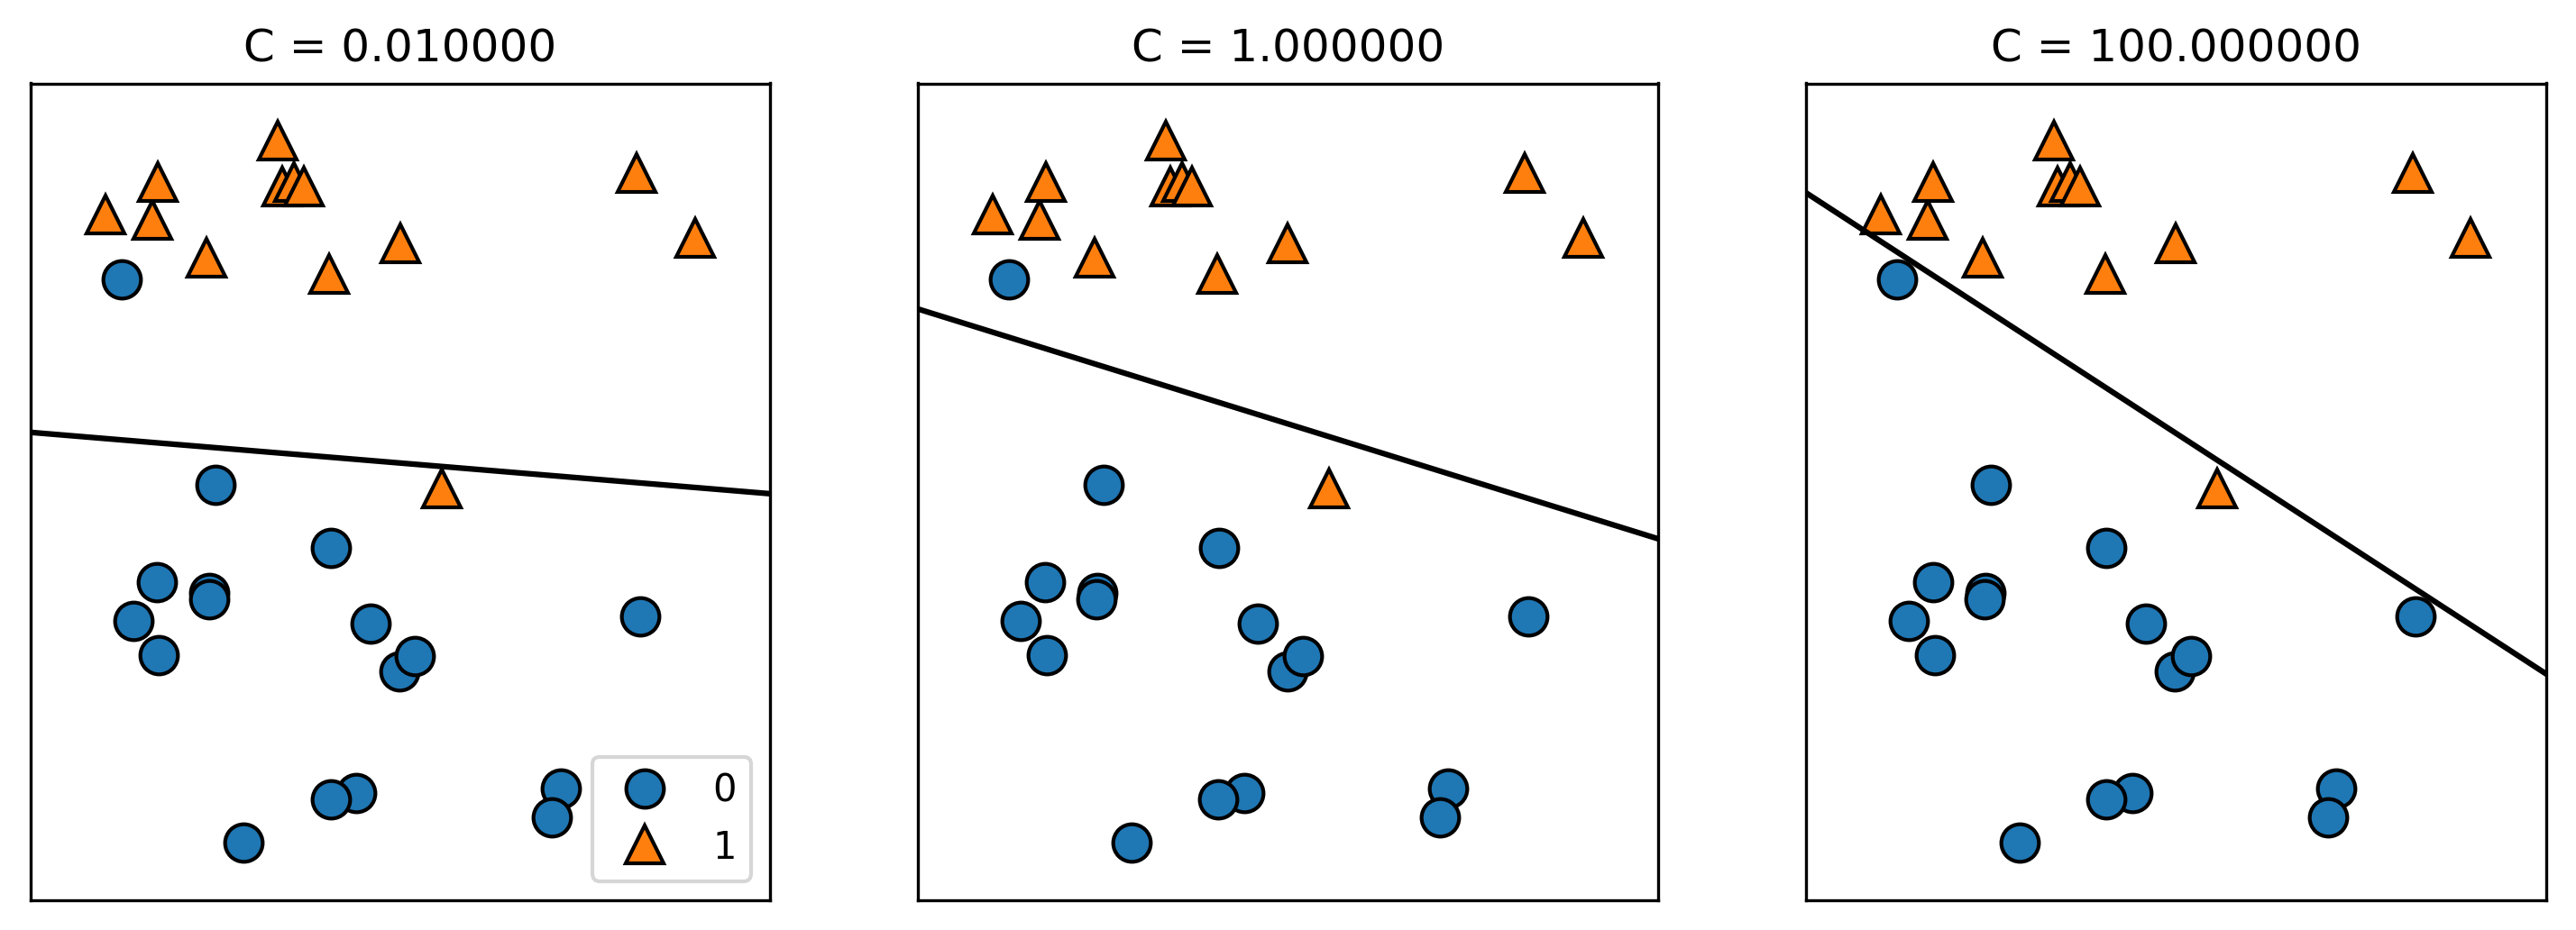

In [42]:
mglearn.plots.plot_linear_svc_regularization()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


In [45]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


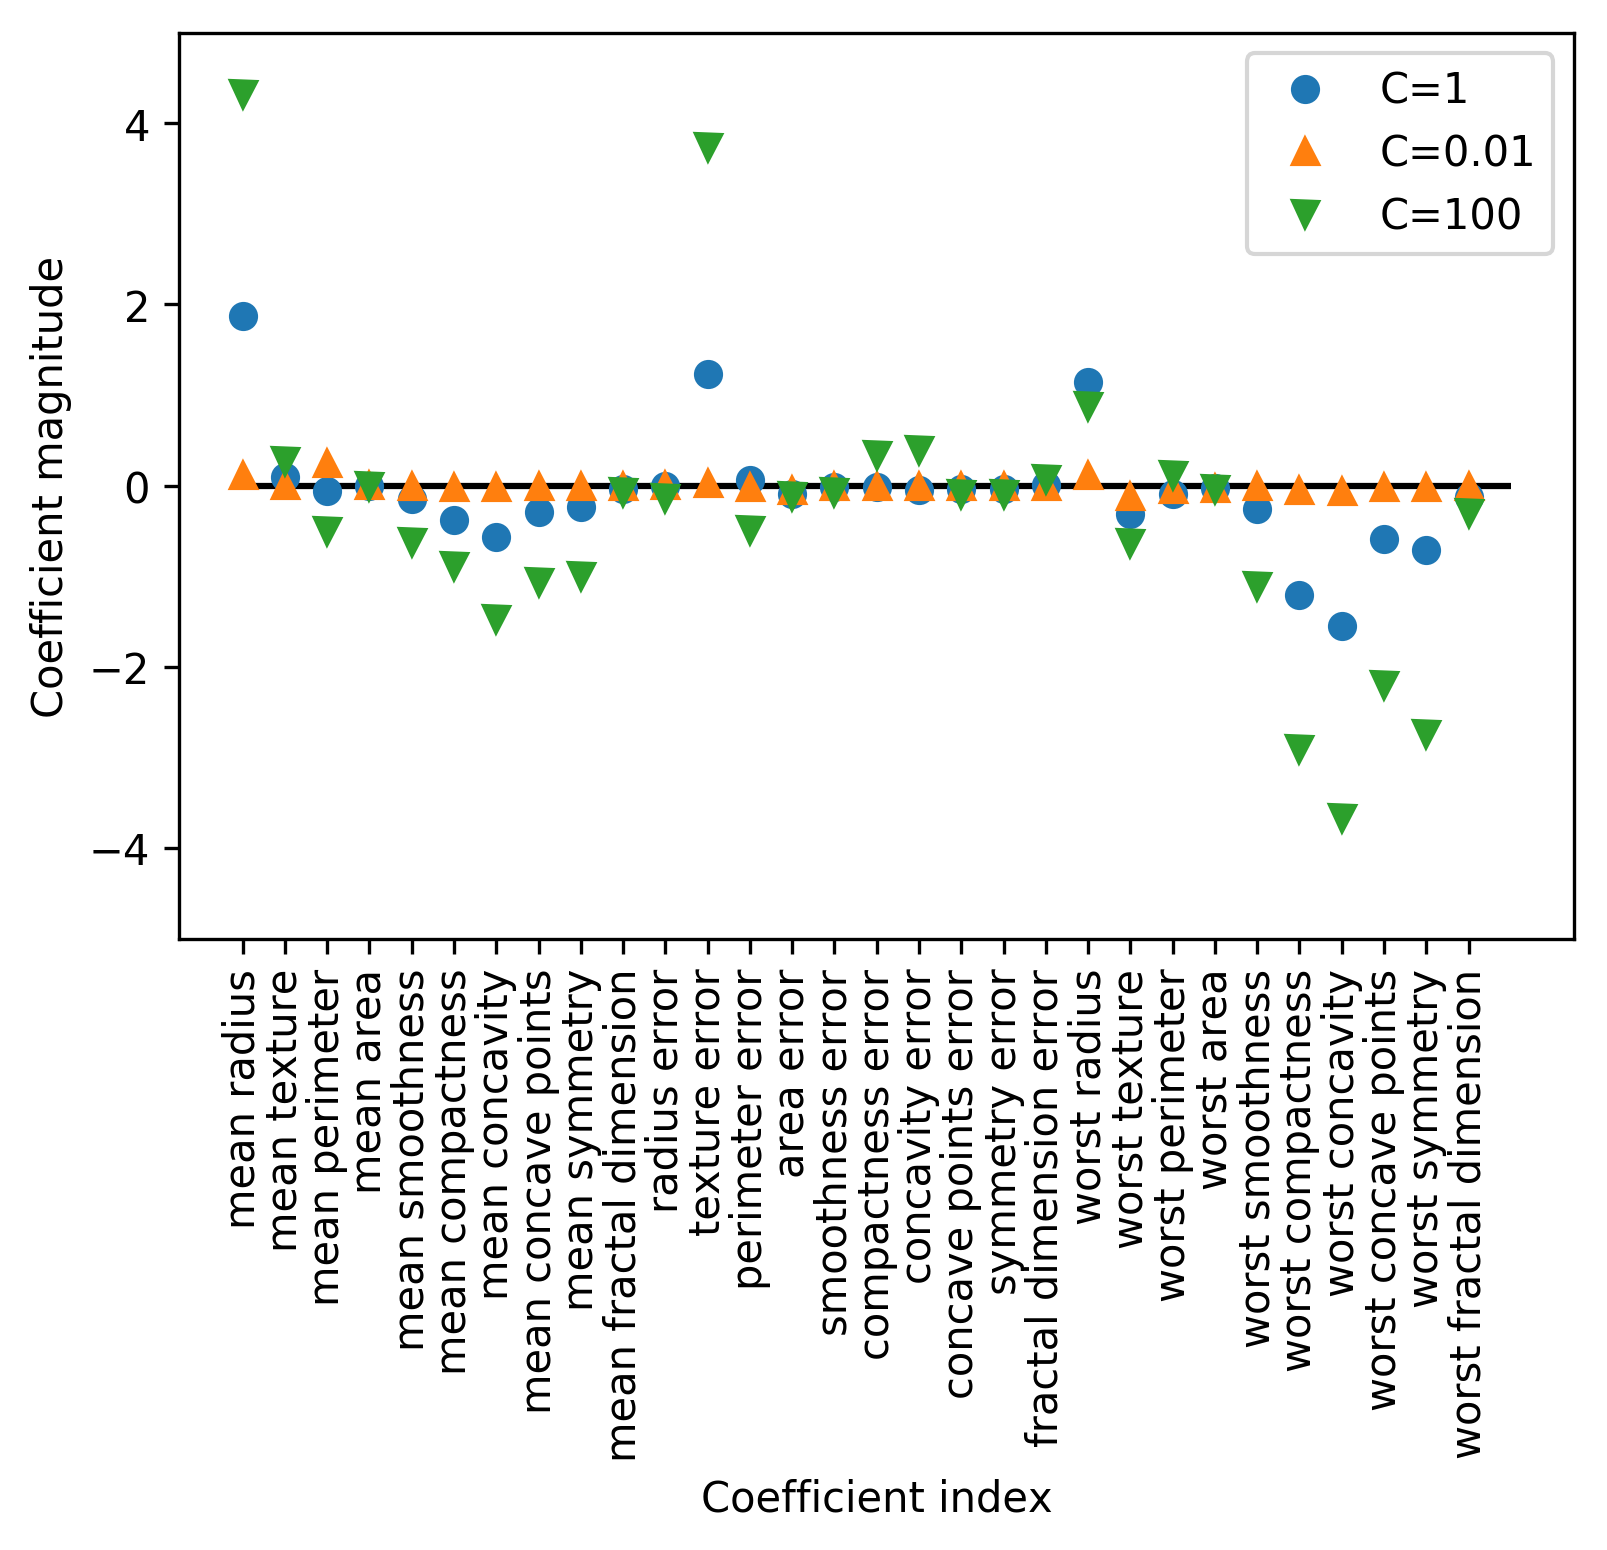

In [46]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.plot(logreg100.coef_.T, 'v', label="C=100")
plt.xticks(range(cancer.data.shape[1]),
           cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


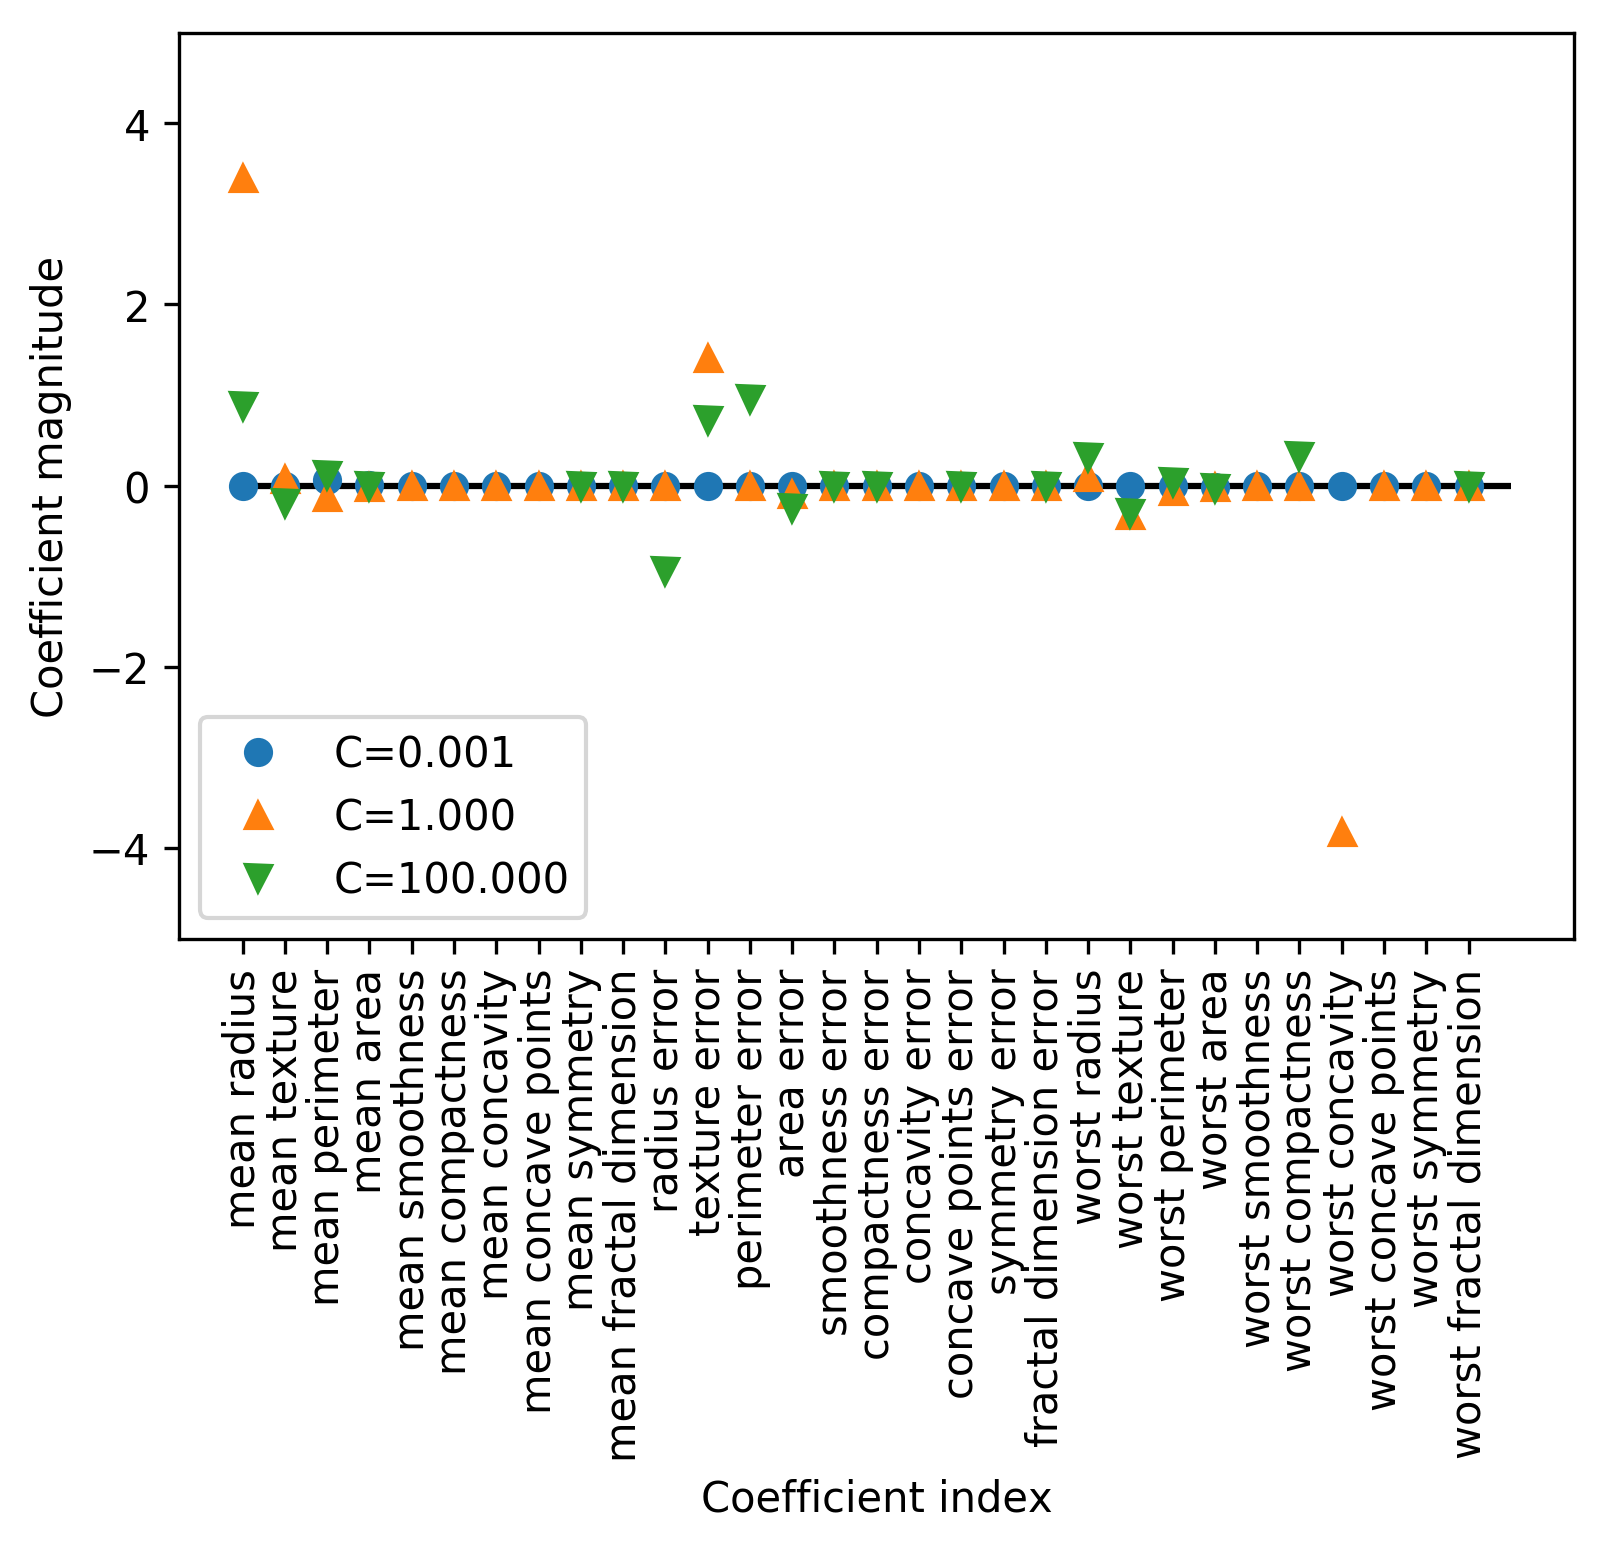

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

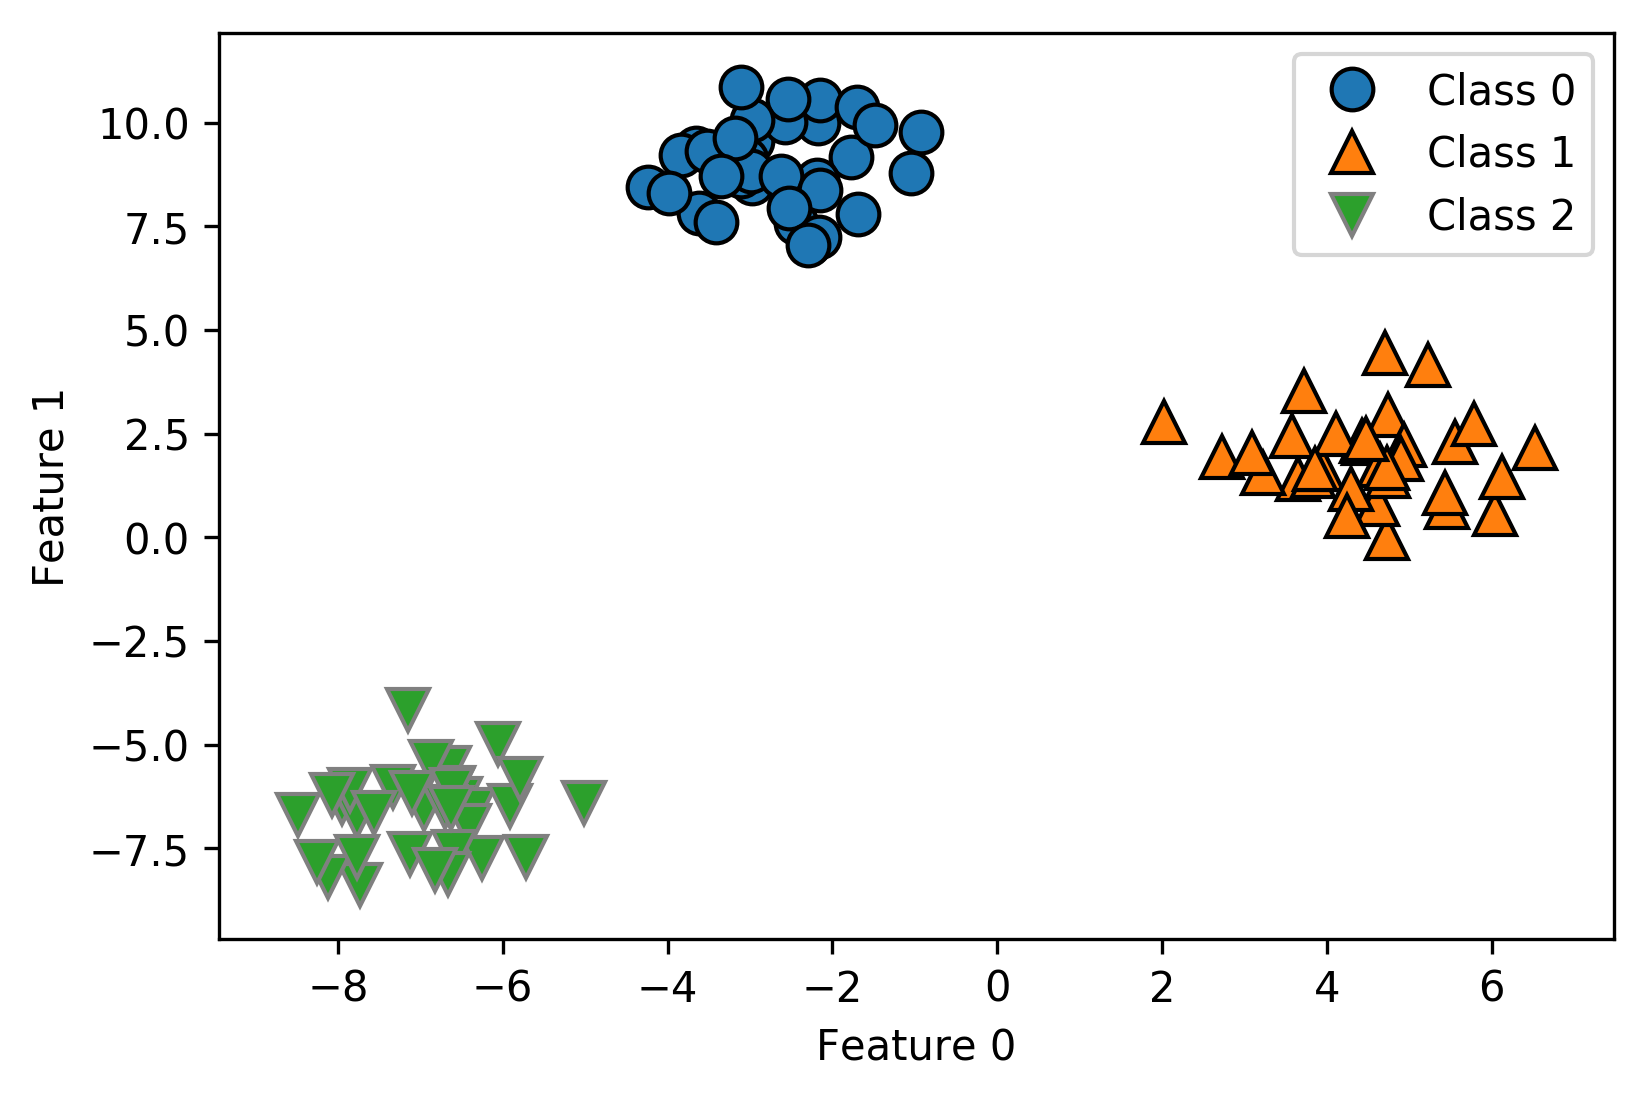

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


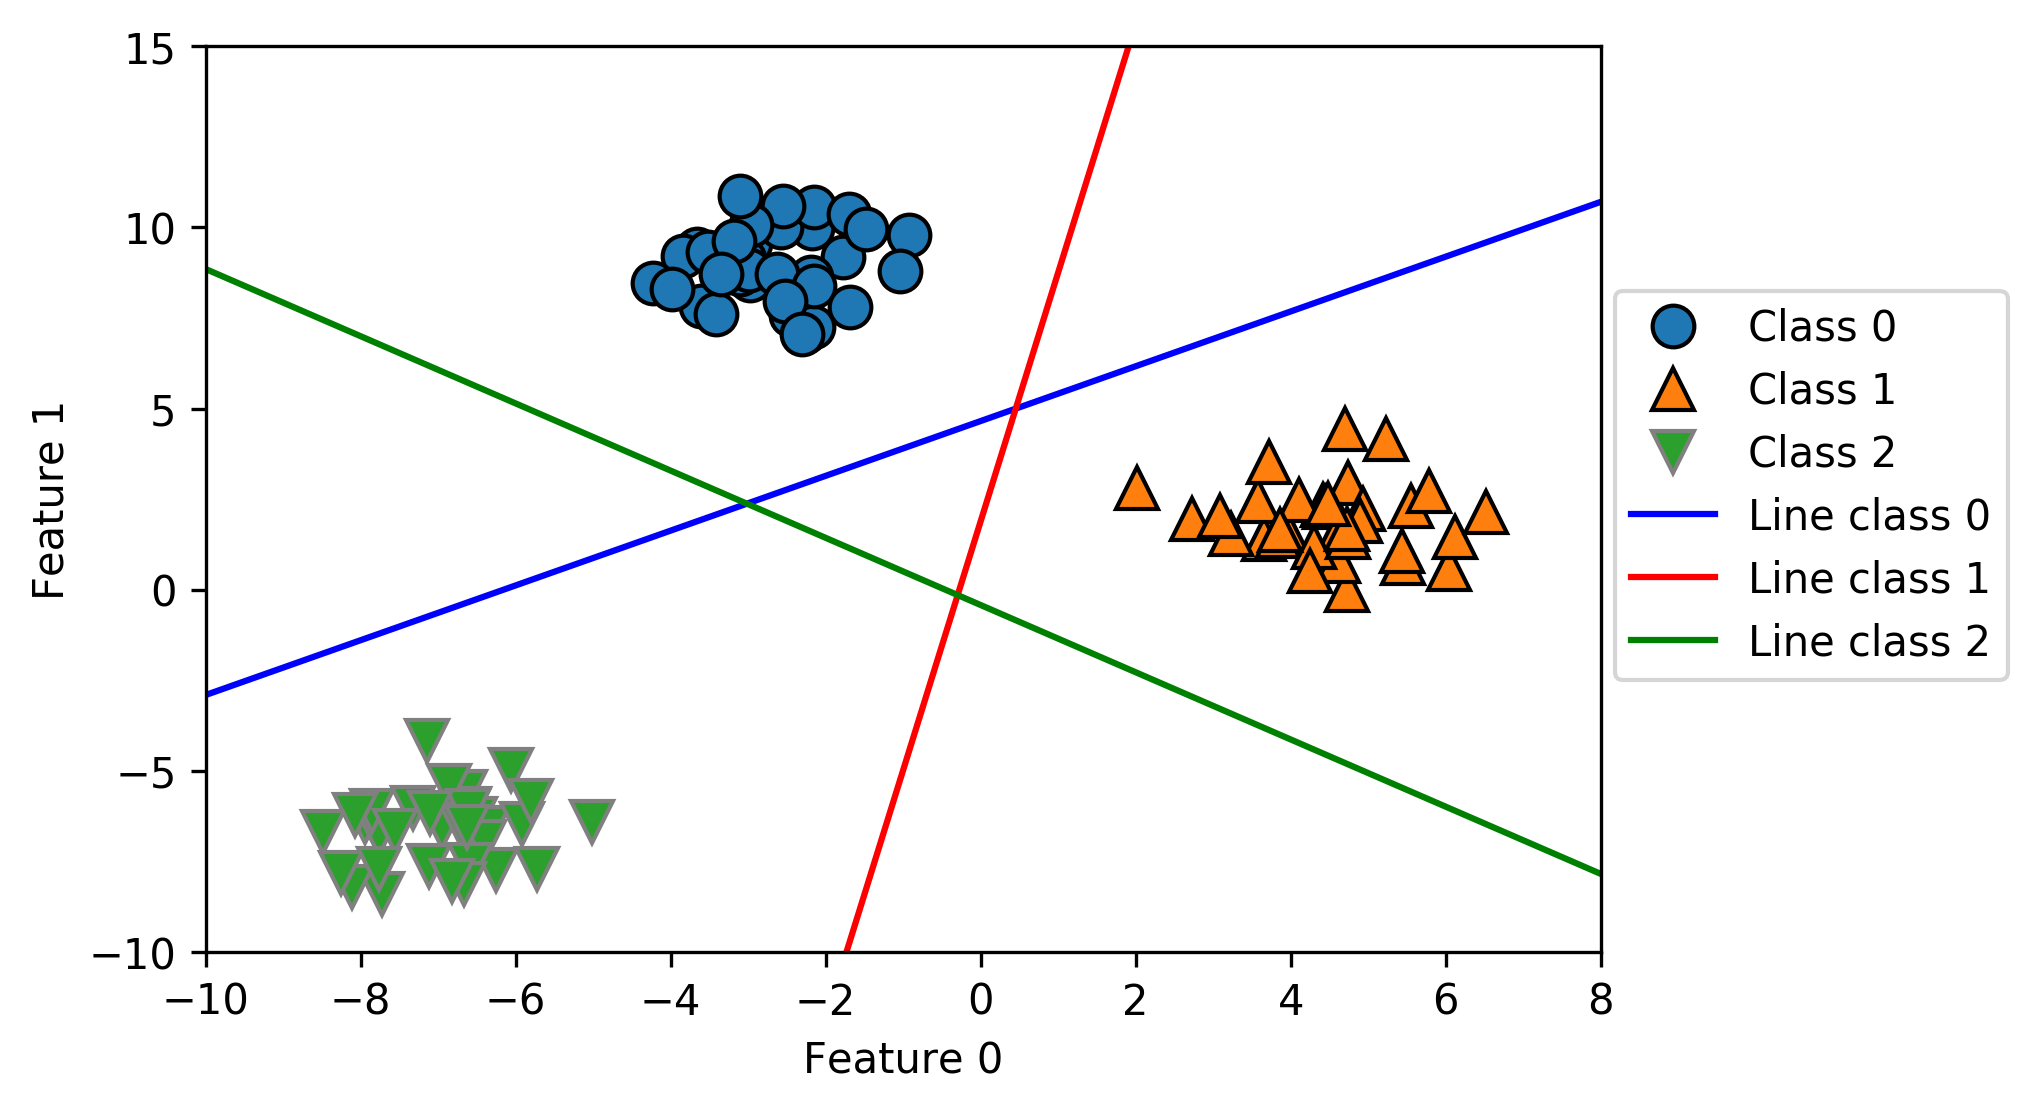

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.xlim(-10, 8)
plt.ylim(-10, 15)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"],
          loc=(1.01, 0.3))

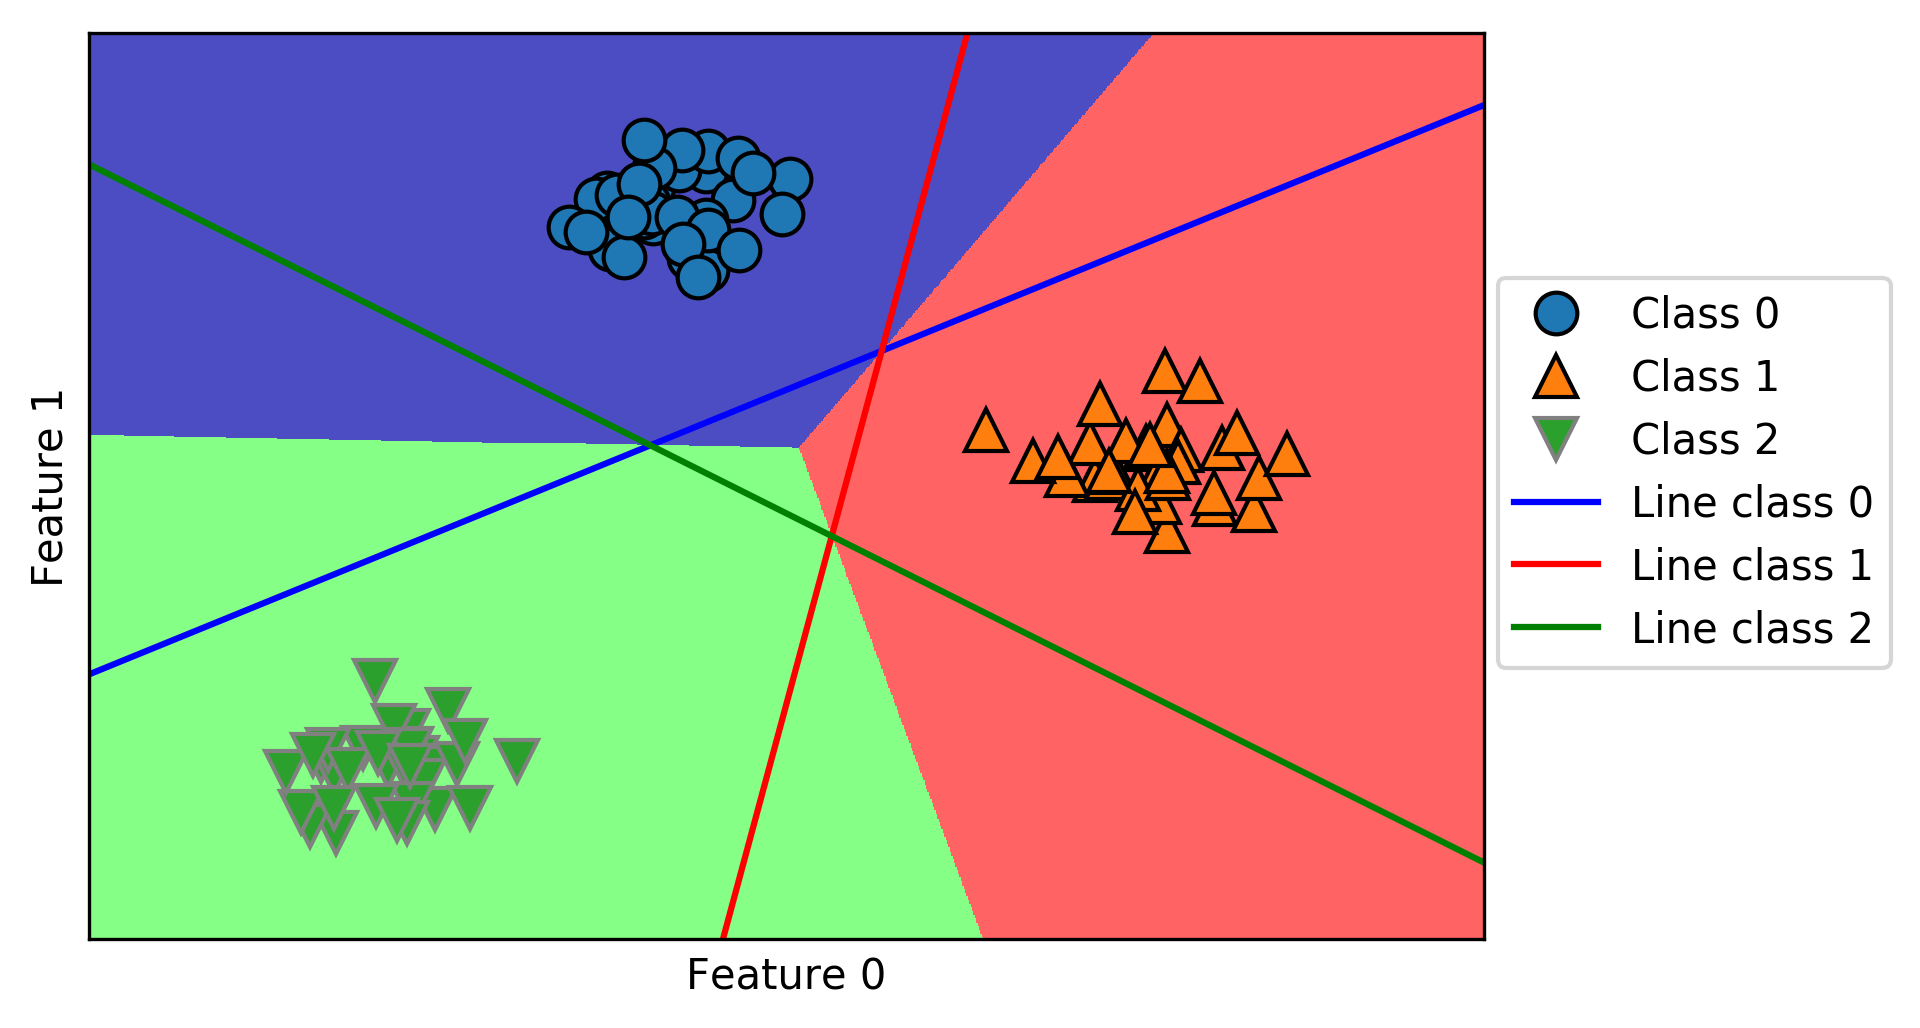

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [52]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


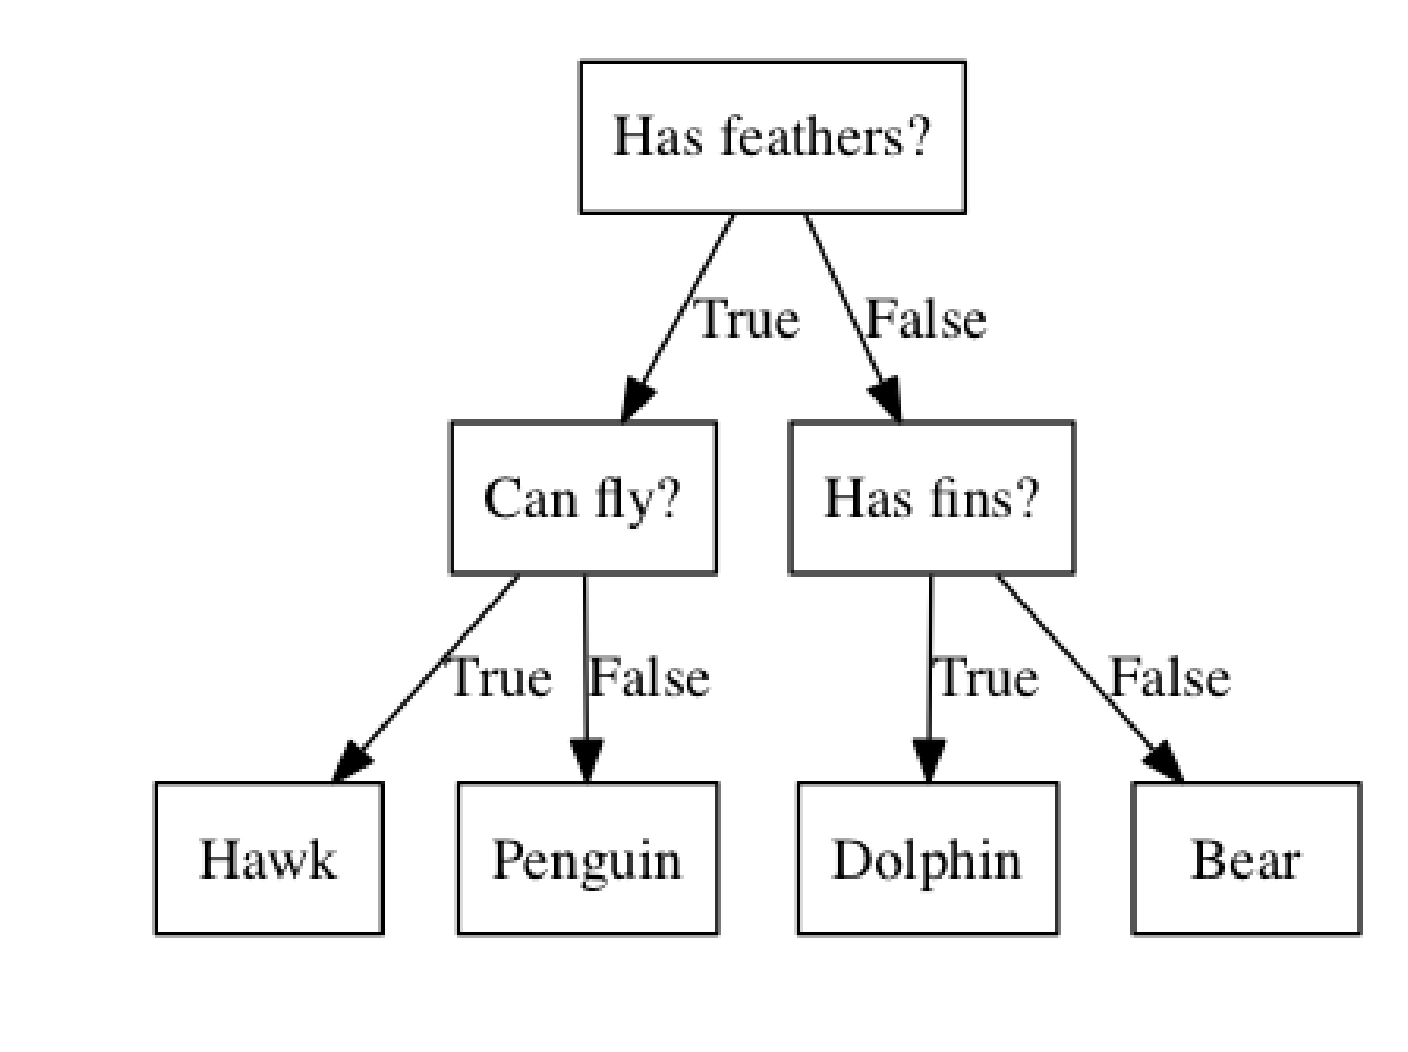

In [53]:
mglearn.plots.plot_animal_tree()